In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from matplotlib.gridspec import GridSpec

2024-12-30 14:42:01,099 - INFO     - Executing shutdown due to inactivity...
2024-12-30 14:42:05,161 - INFO     - Executing shutdown...
2024-12-30 14:42:05,161 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [2]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
import dtale
dtale.show(dane)

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_raport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



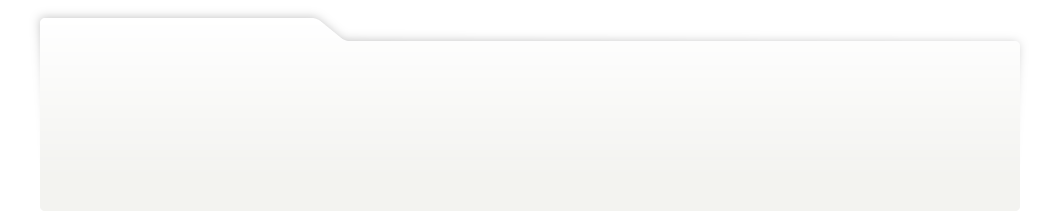
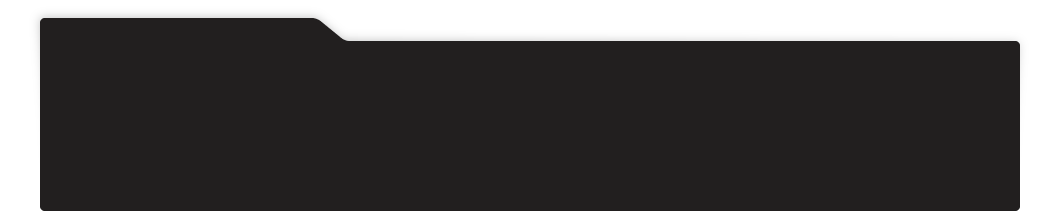
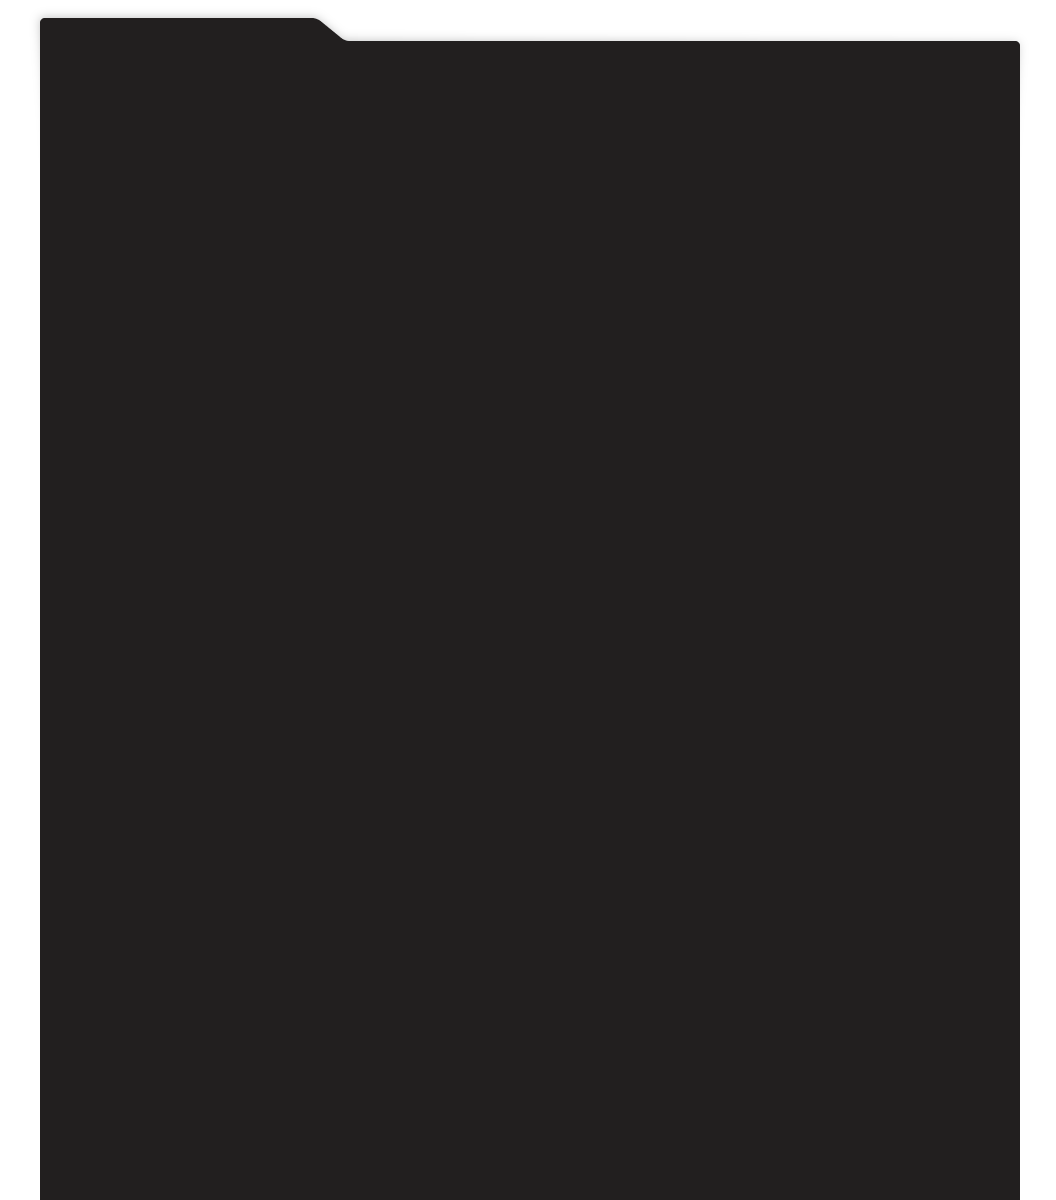
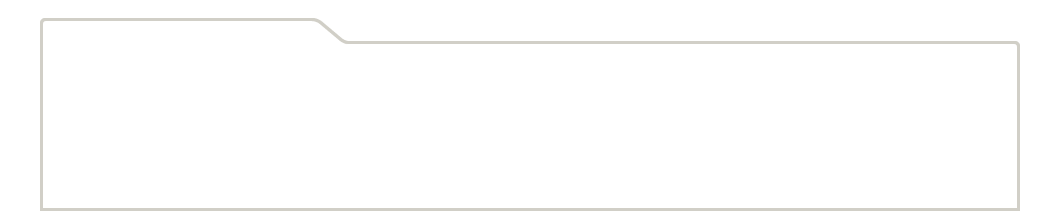
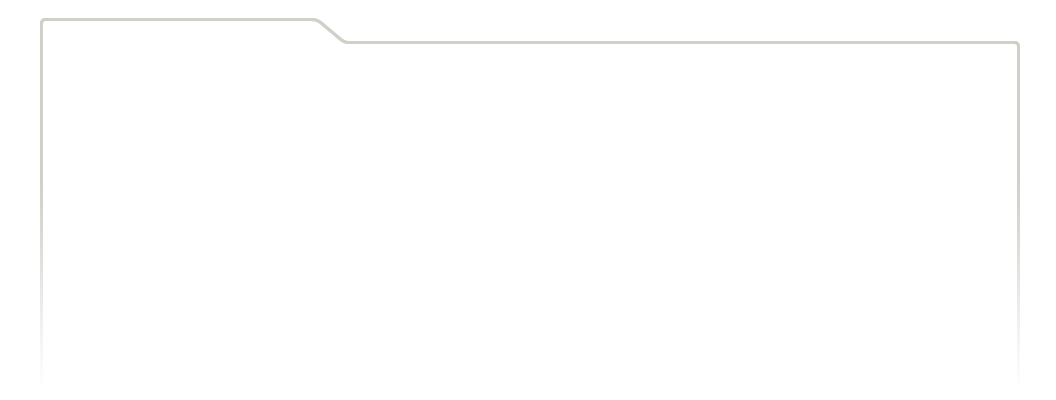
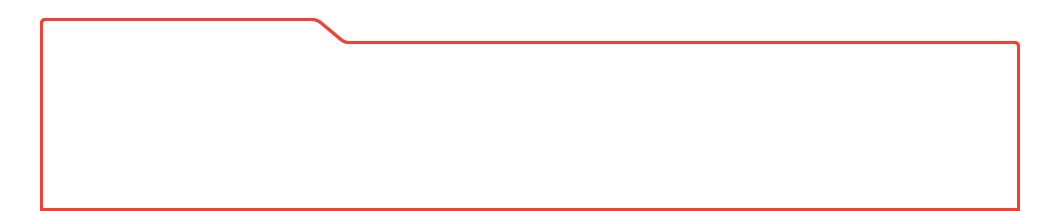
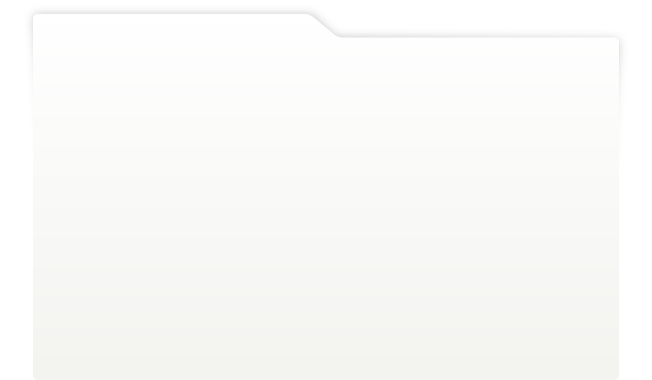
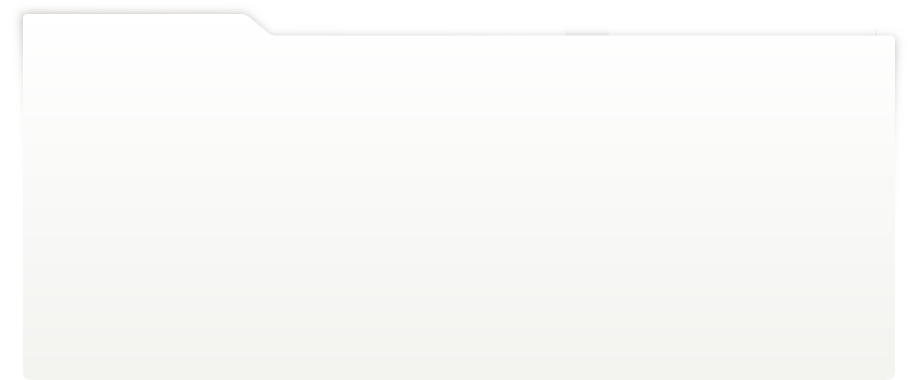
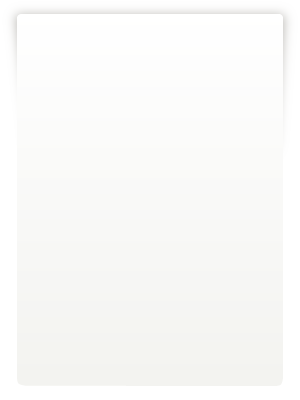
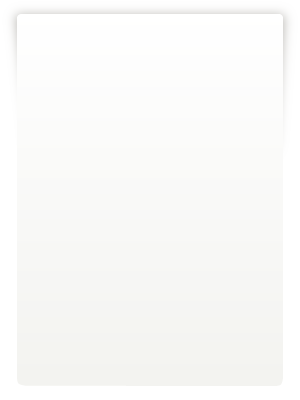
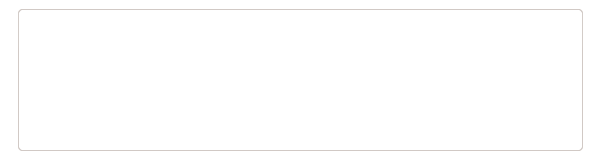
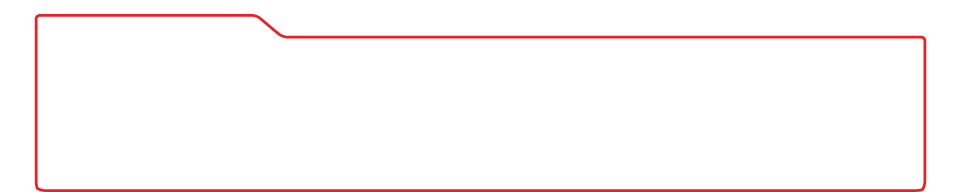
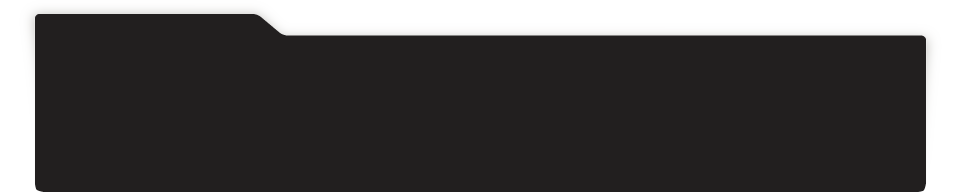
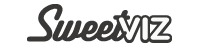
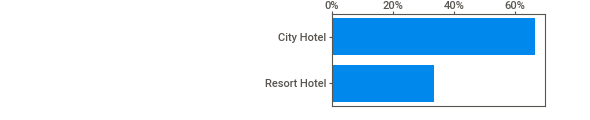
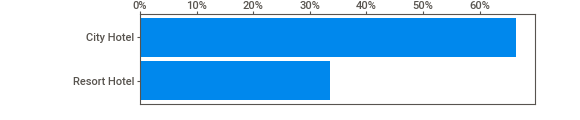
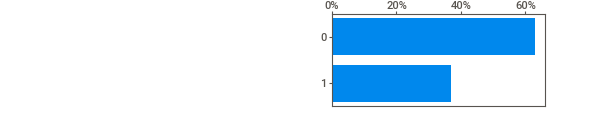
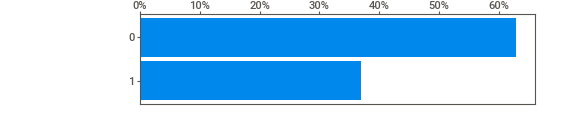
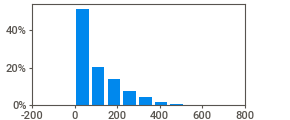
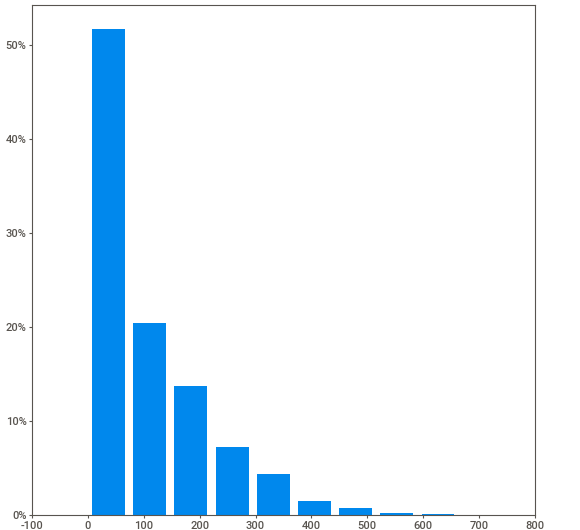
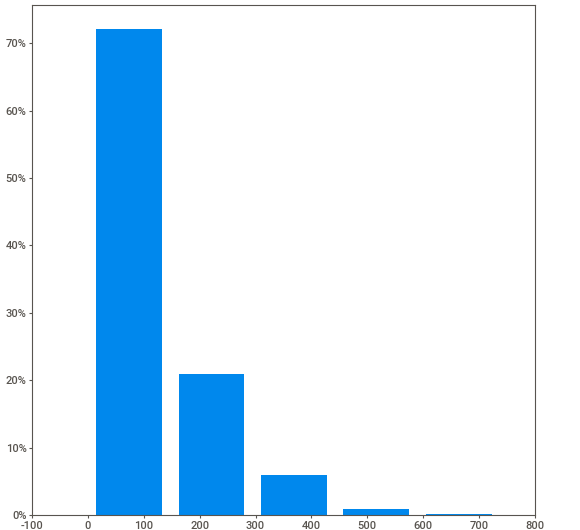
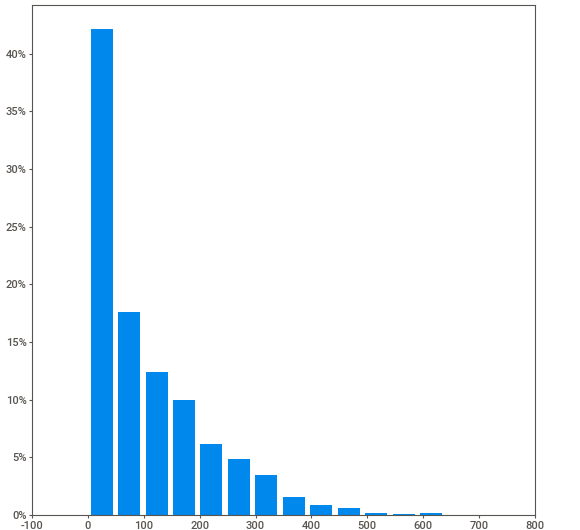
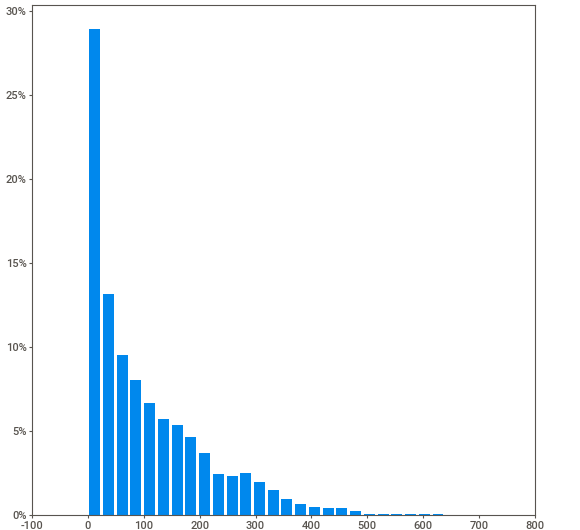
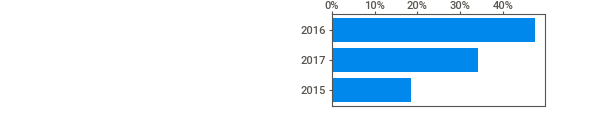
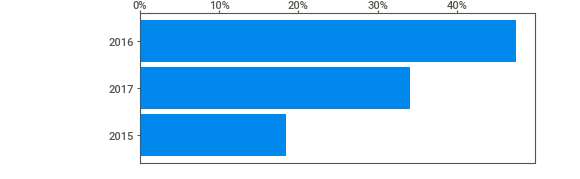
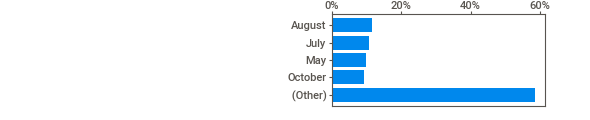
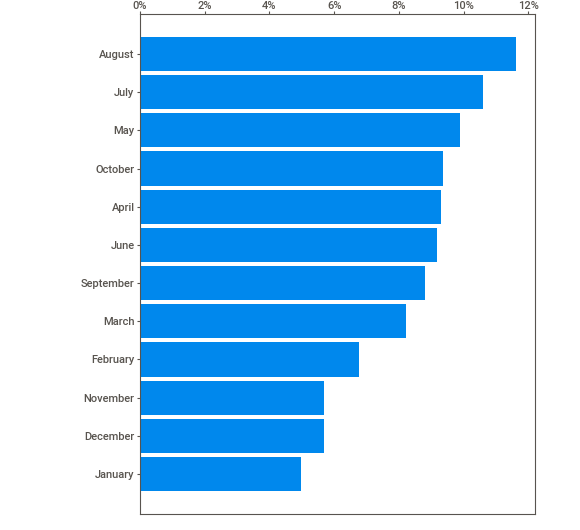
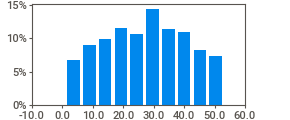
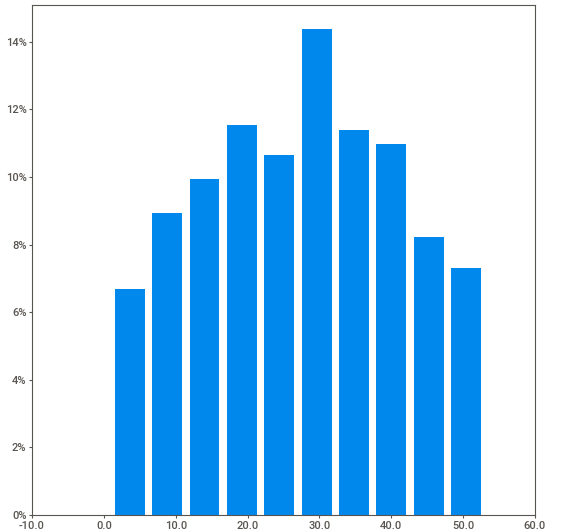
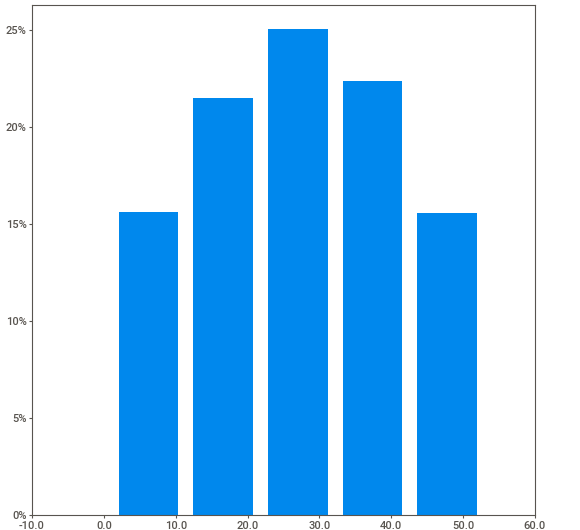
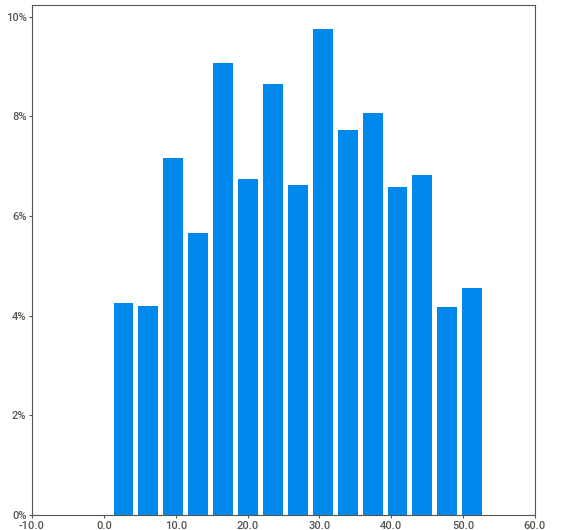
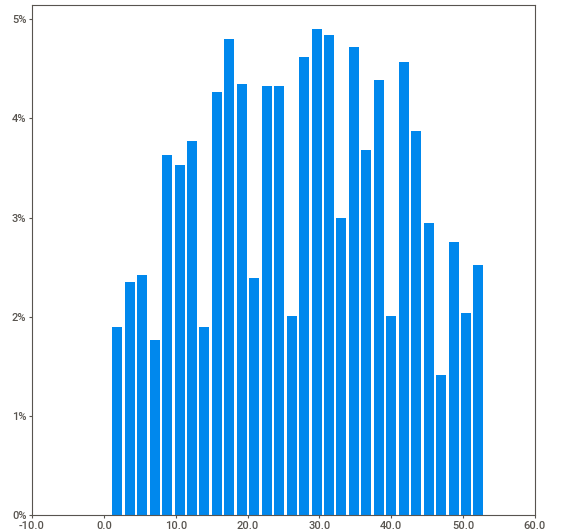
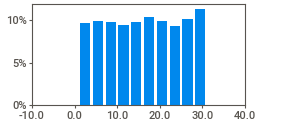
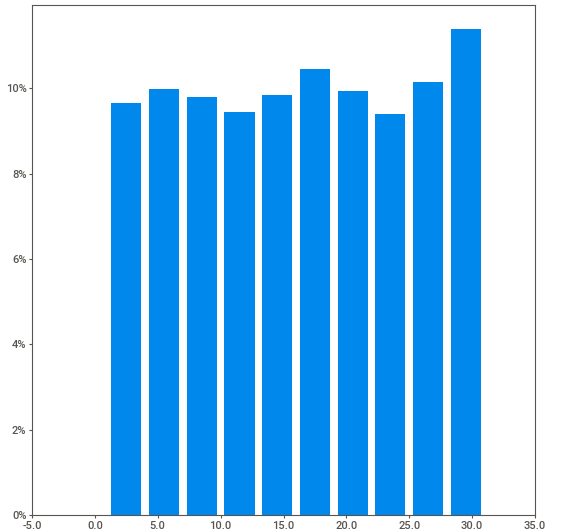
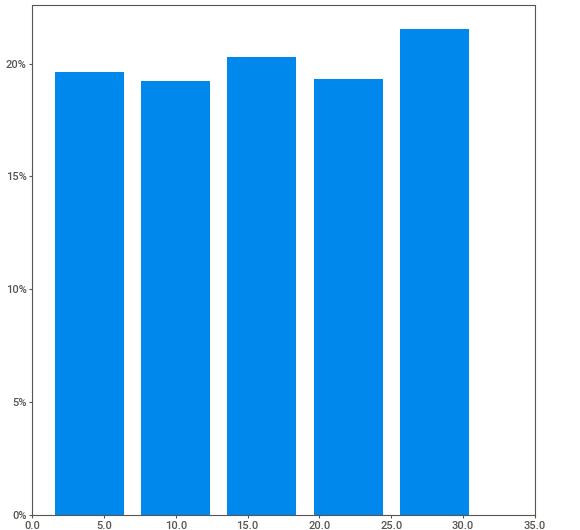
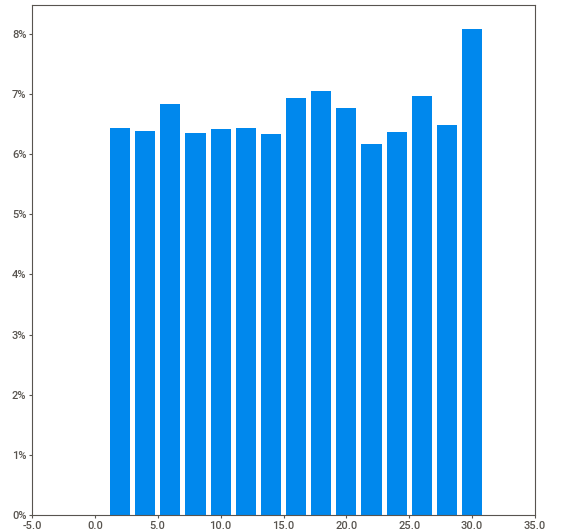
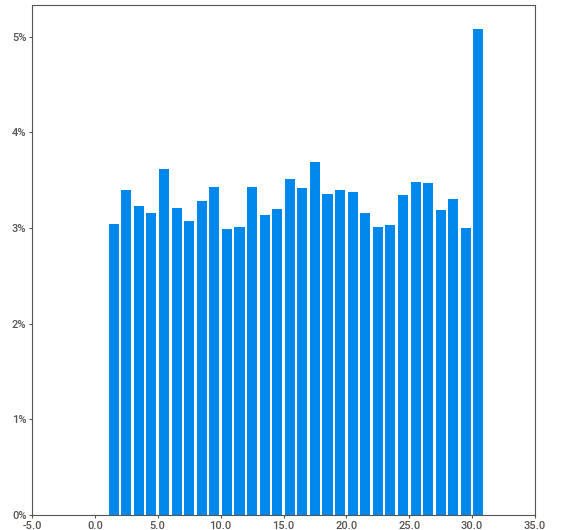
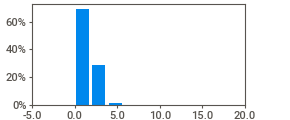
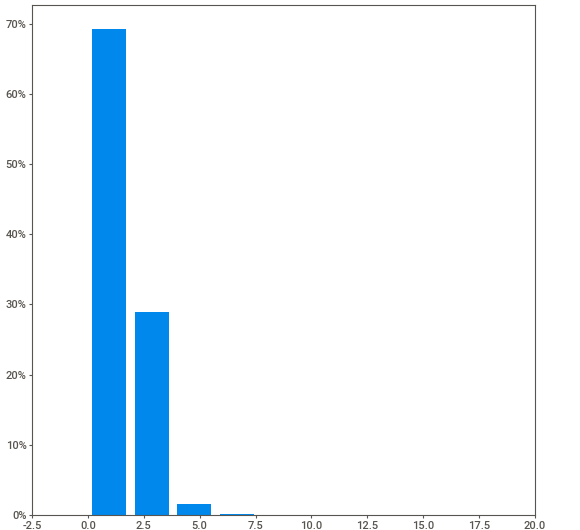
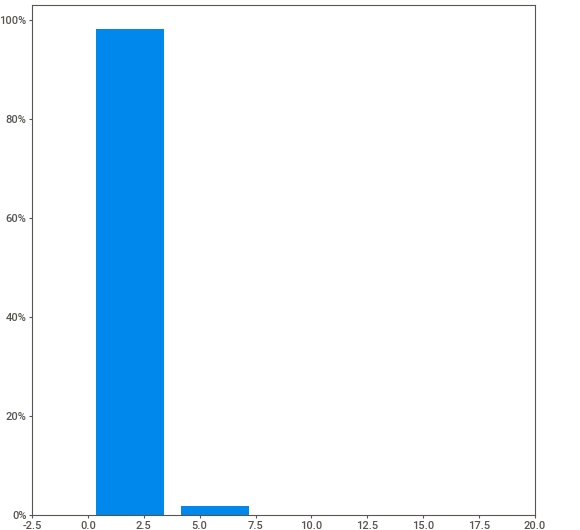
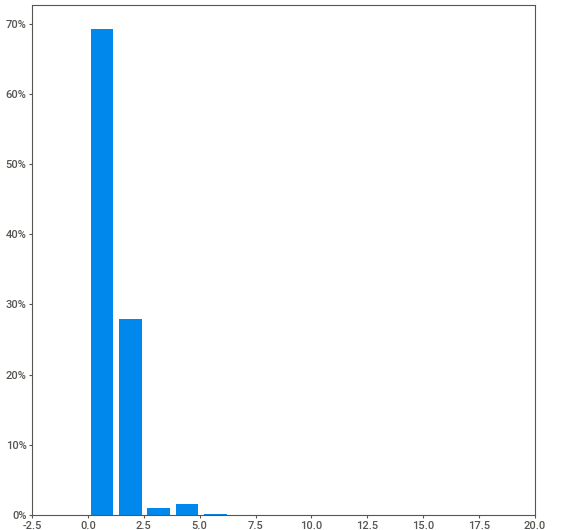
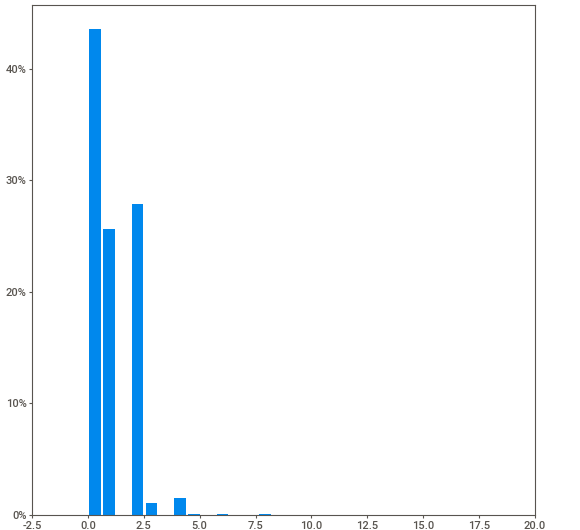
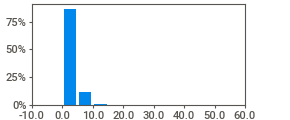
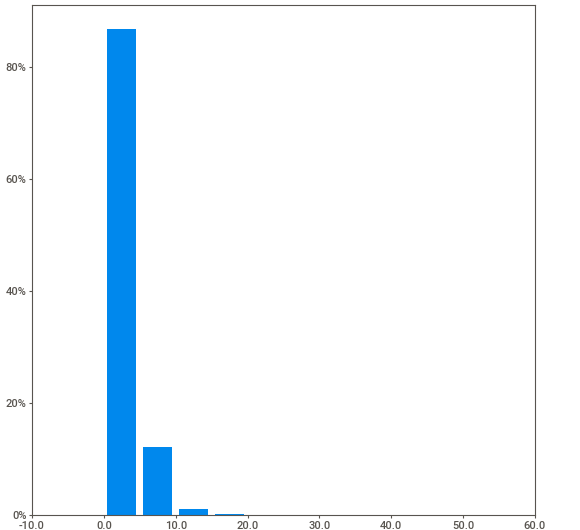
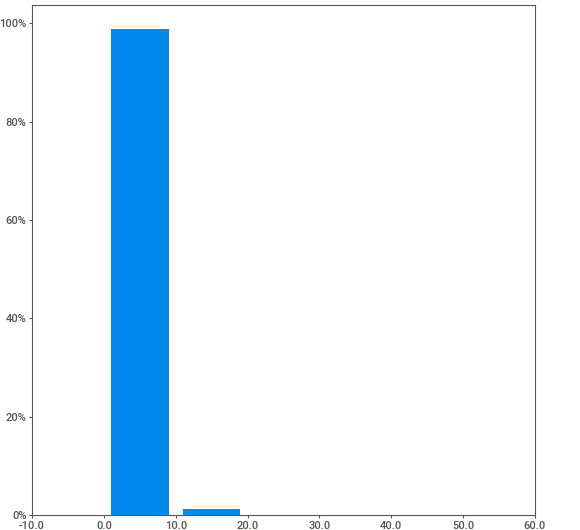
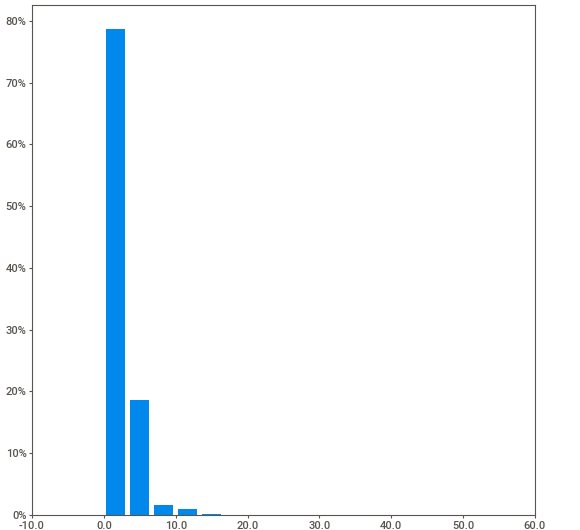
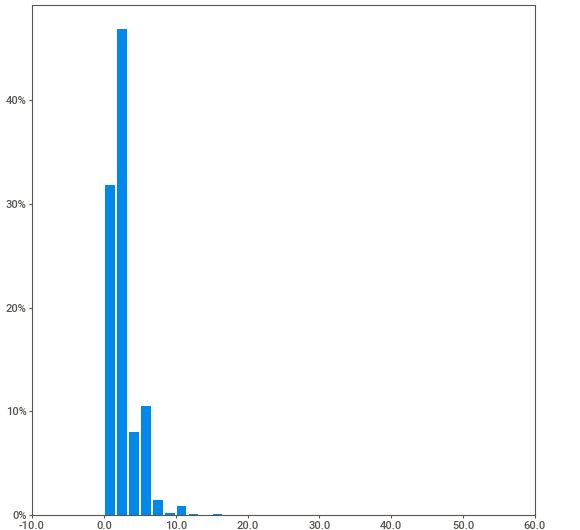
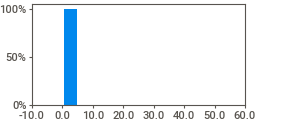
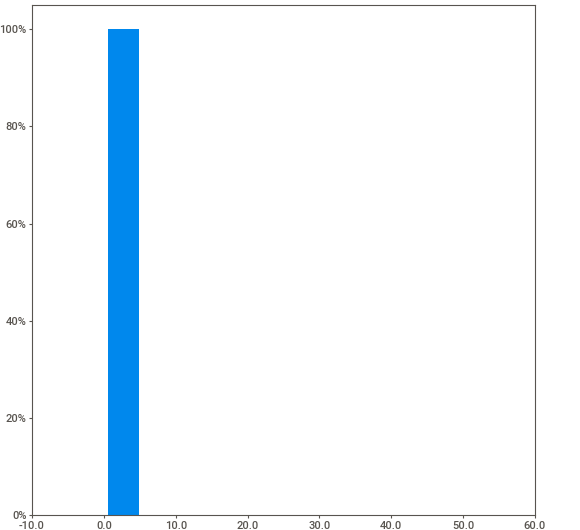
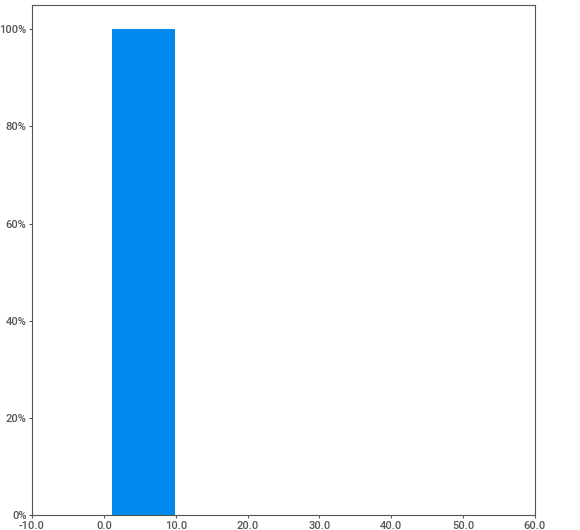
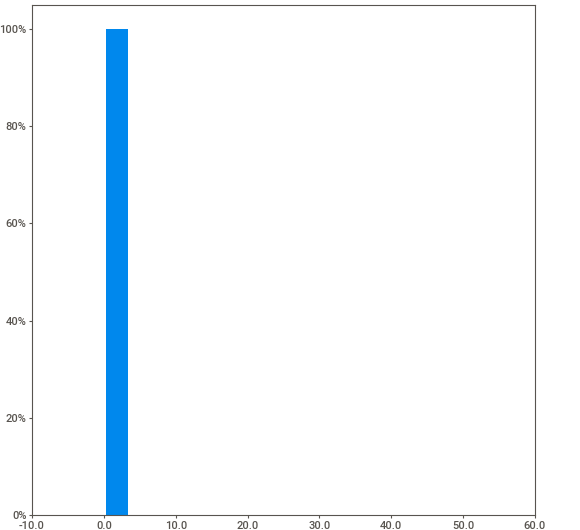
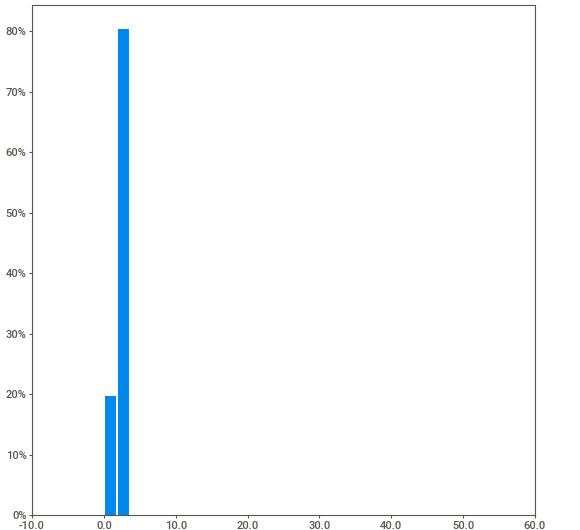
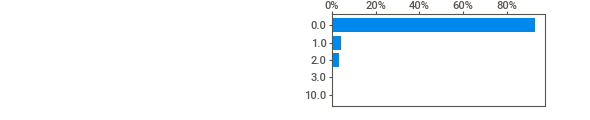
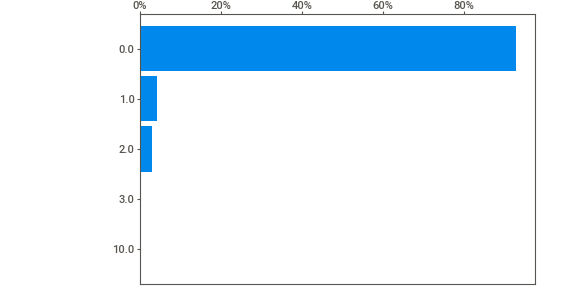
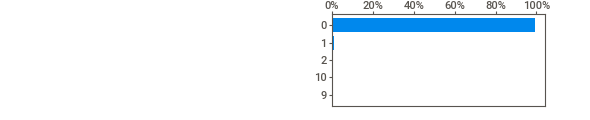
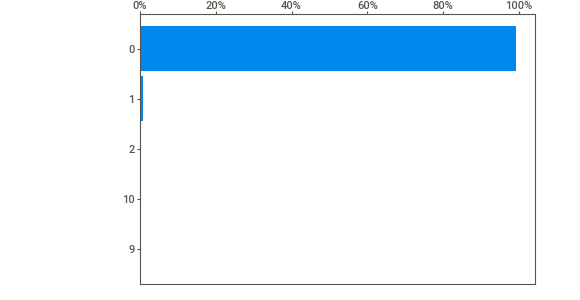
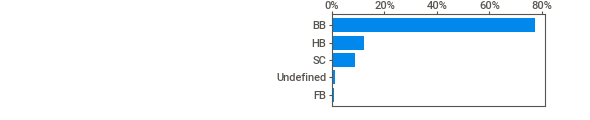
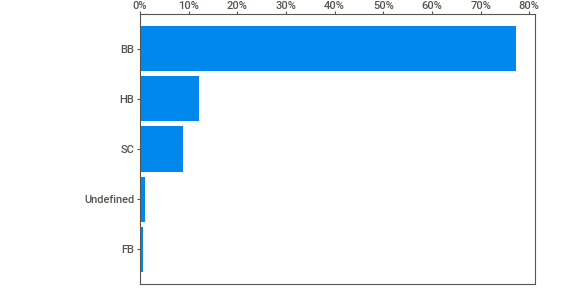
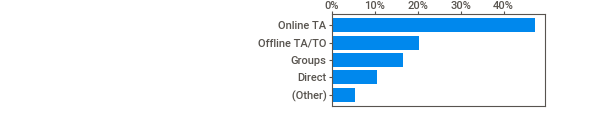
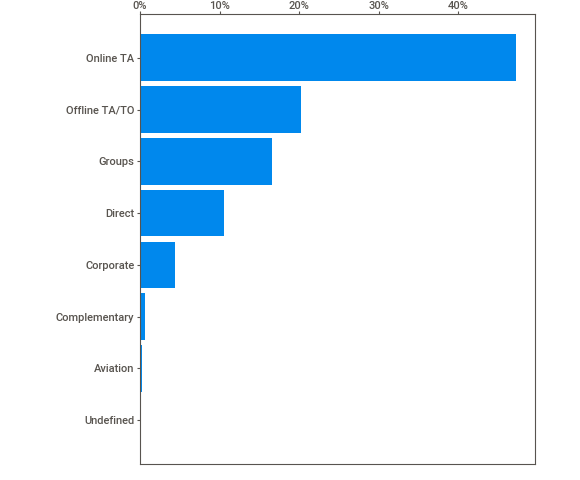
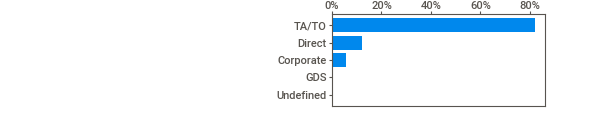
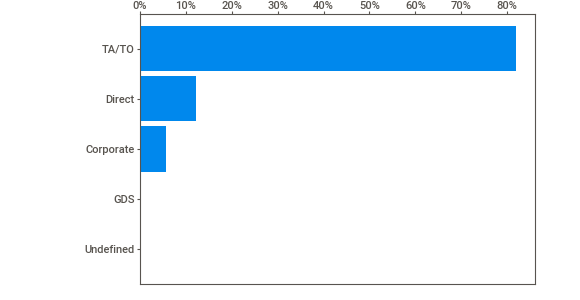
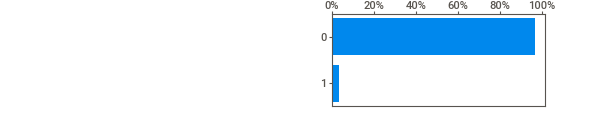
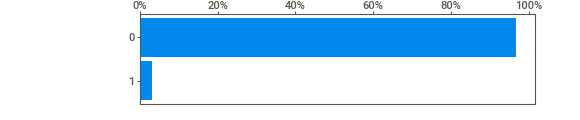
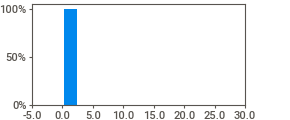
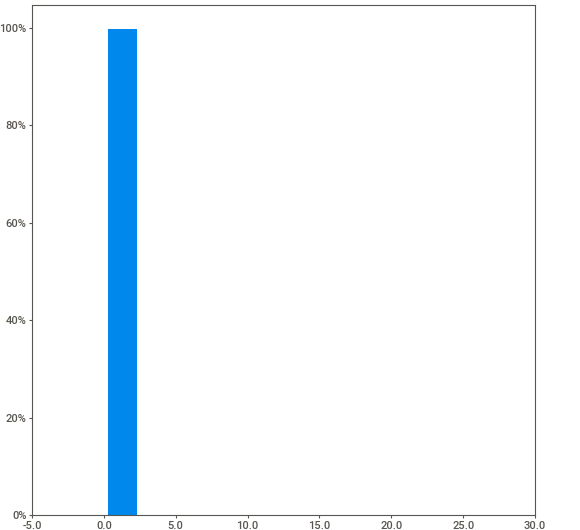
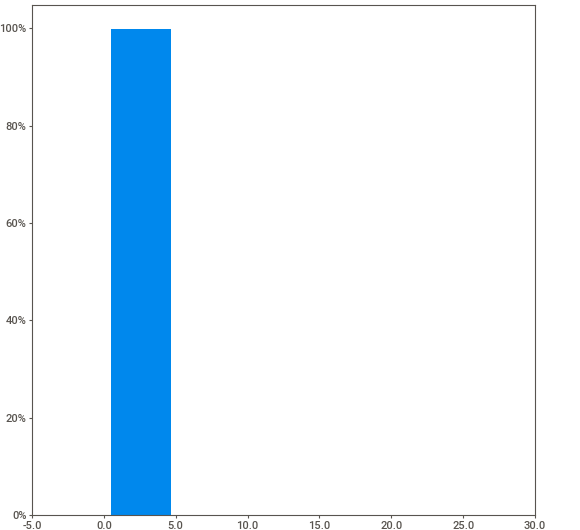
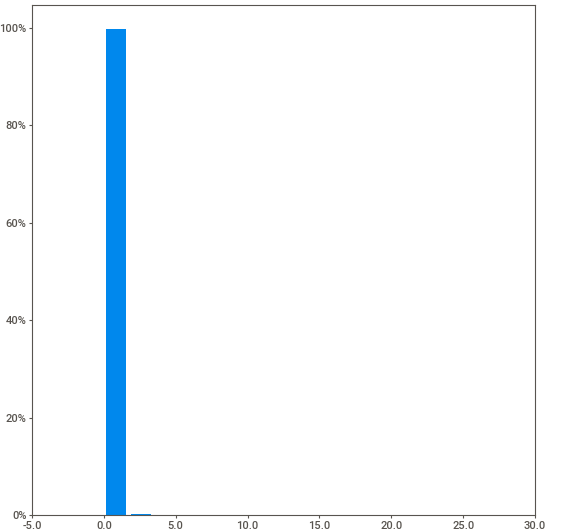
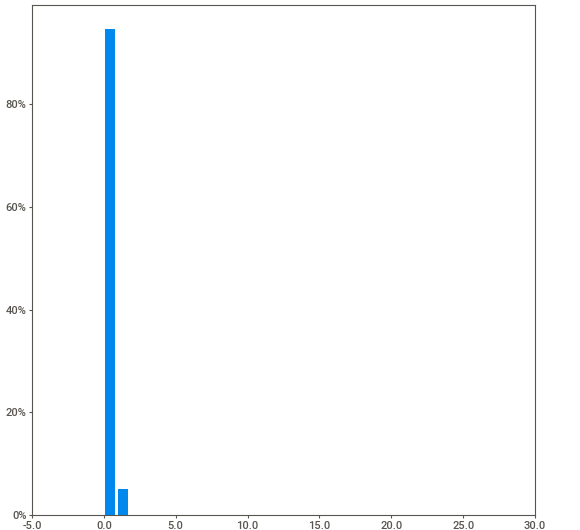
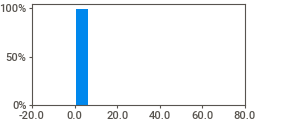
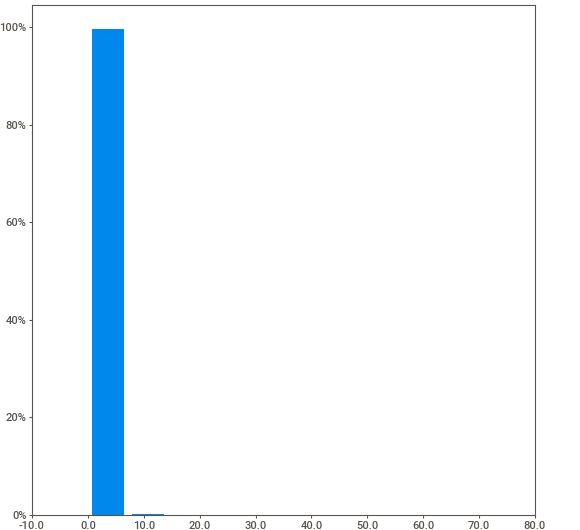
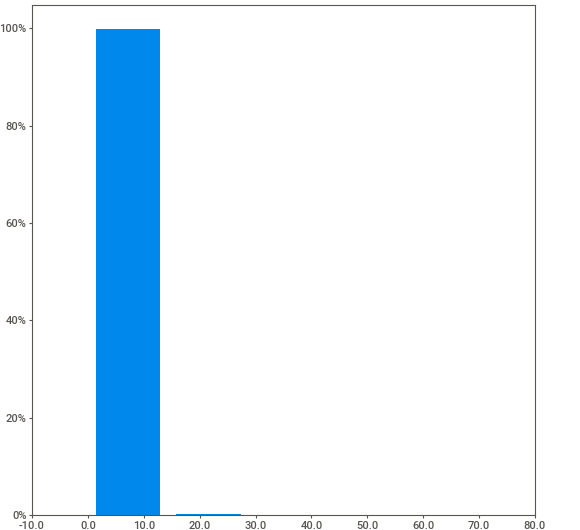
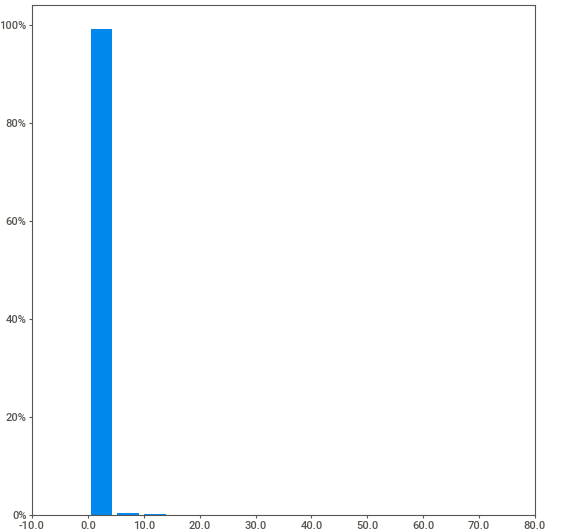
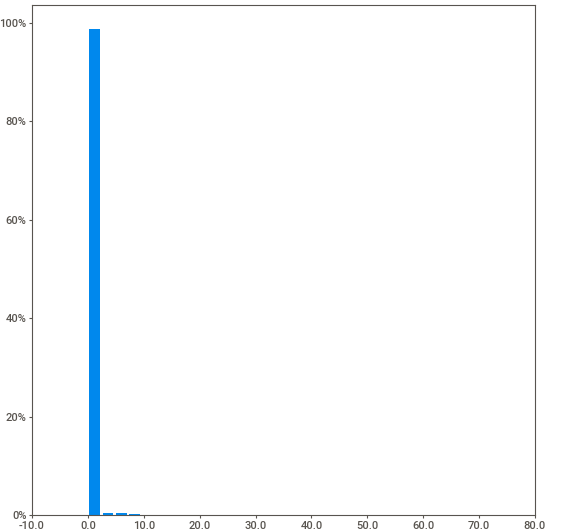
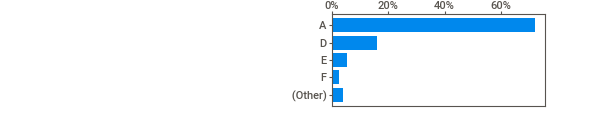
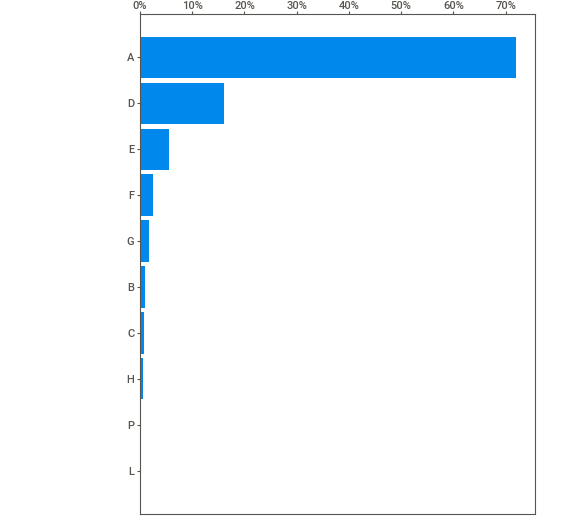
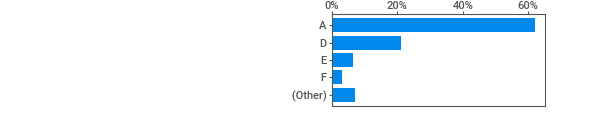
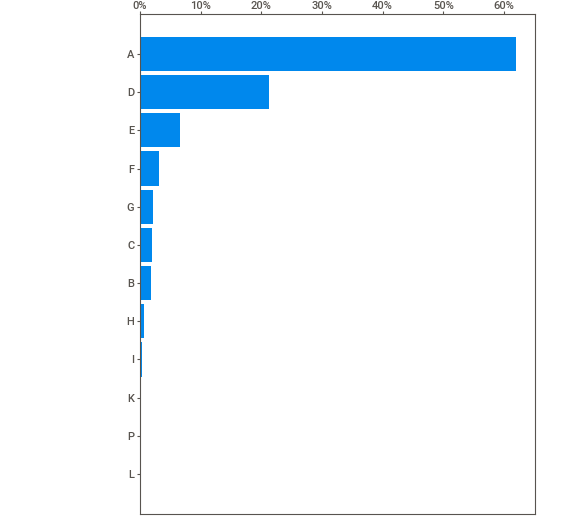
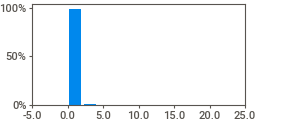
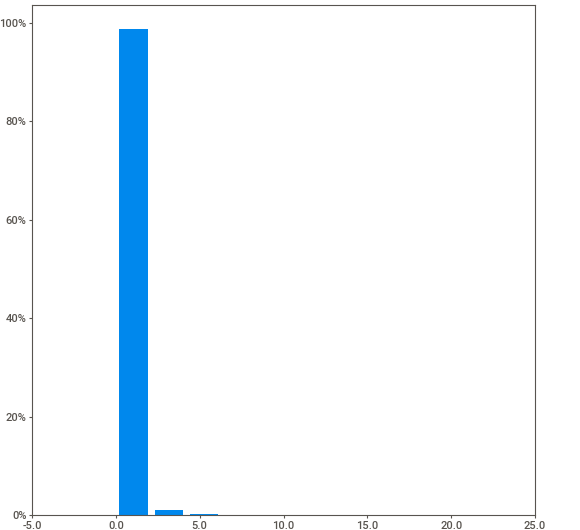
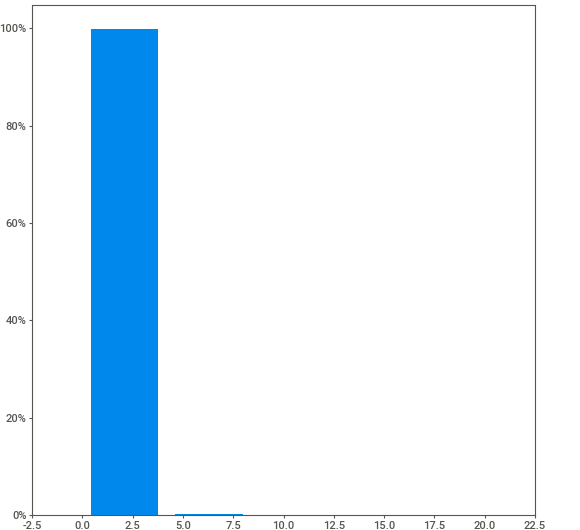
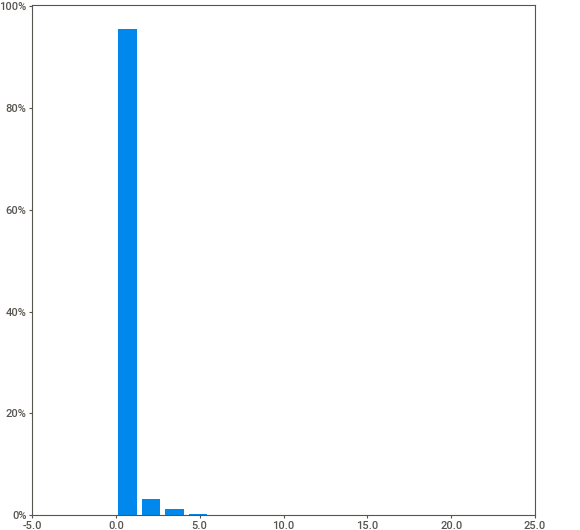
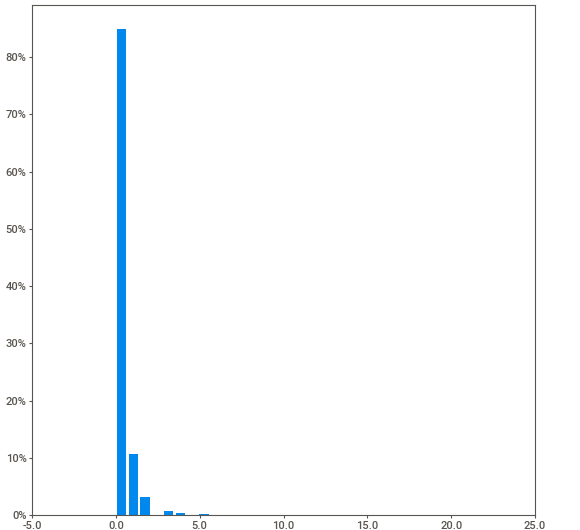
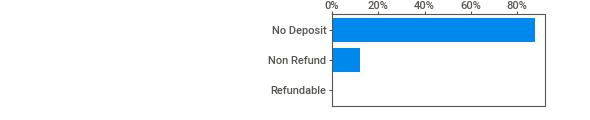
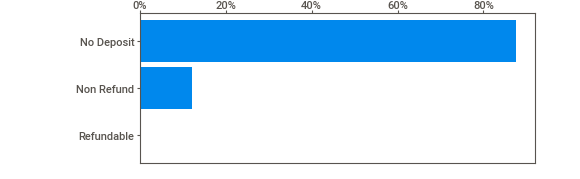
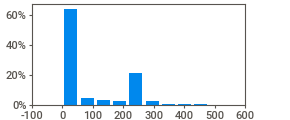
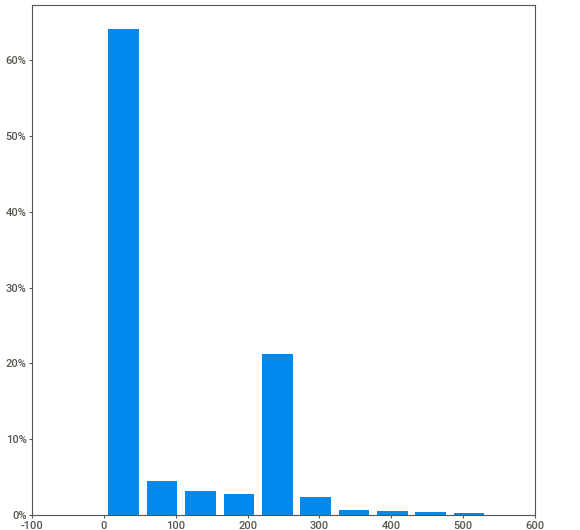
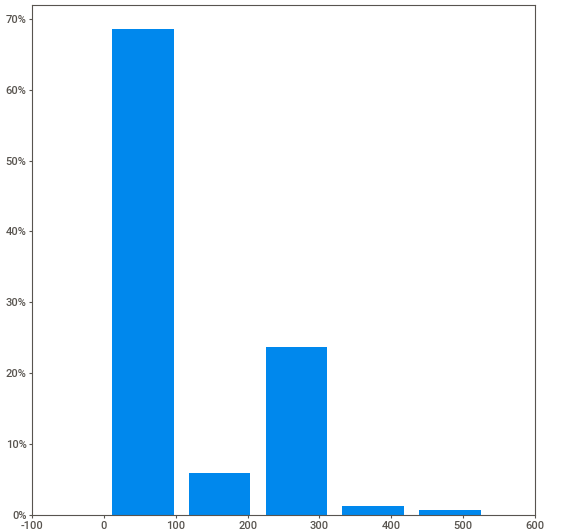
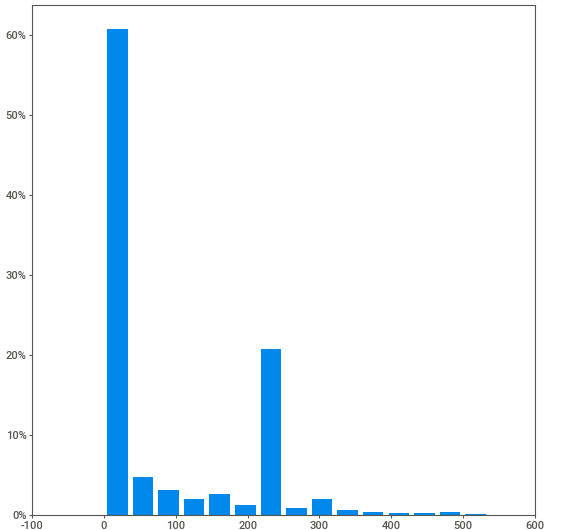
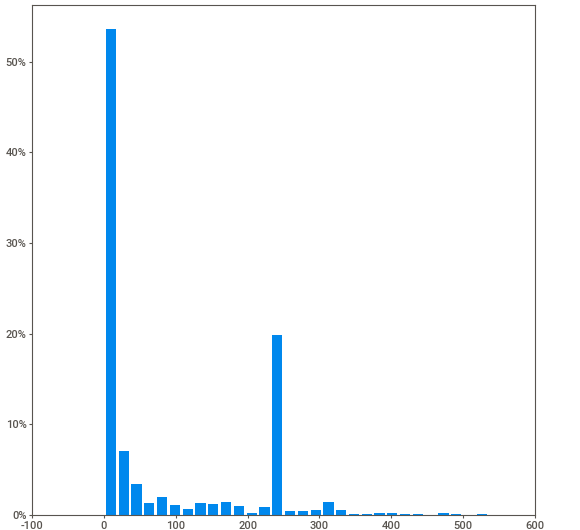
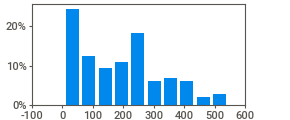
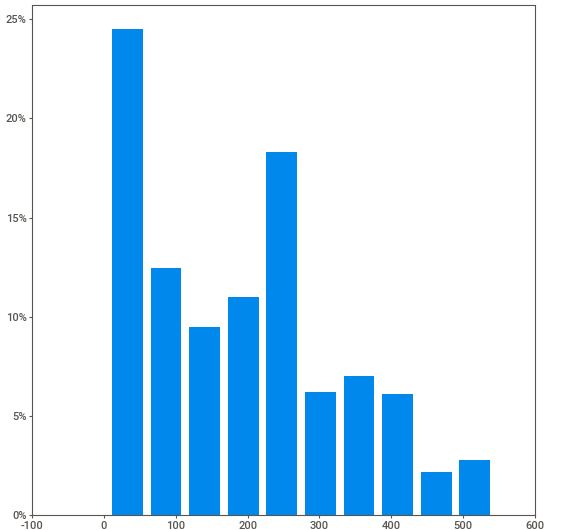
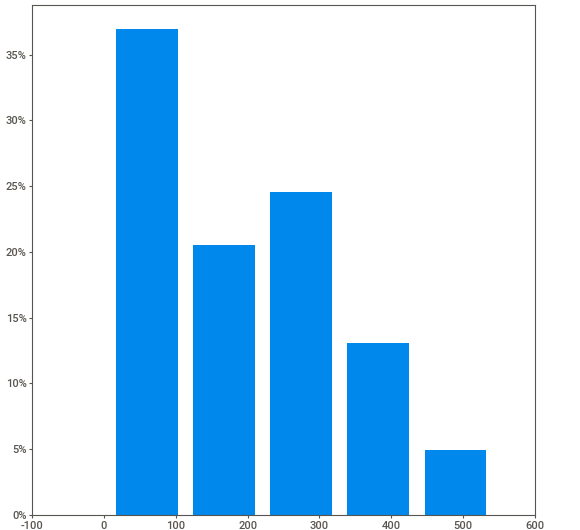
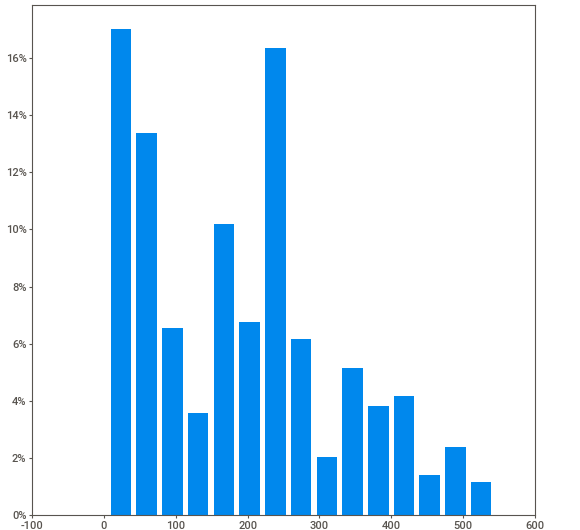
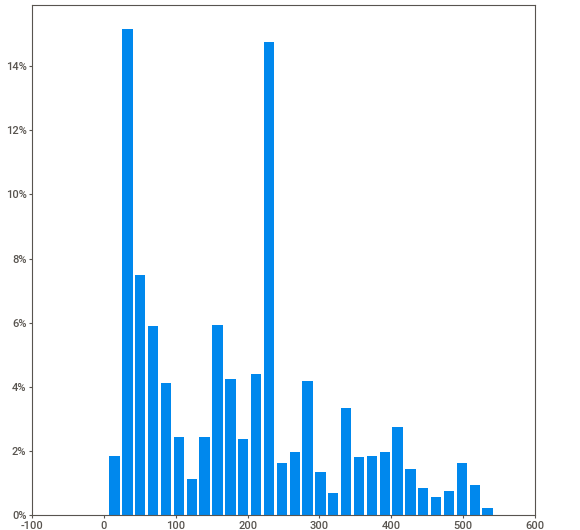
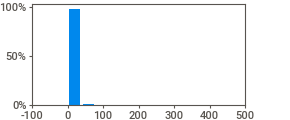
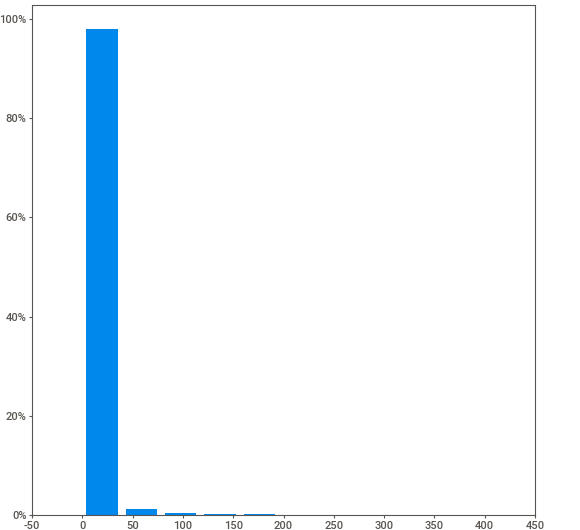
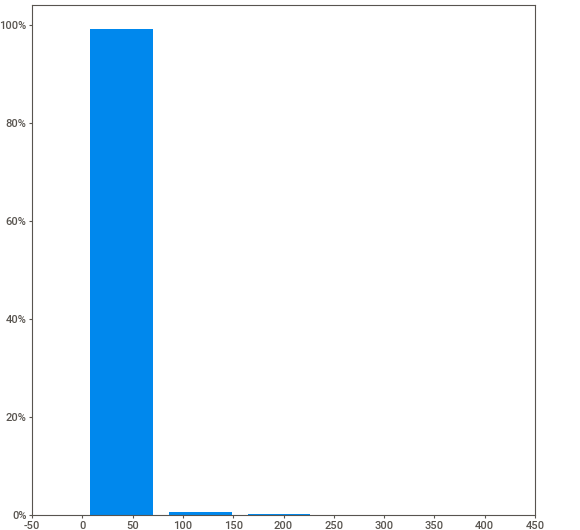
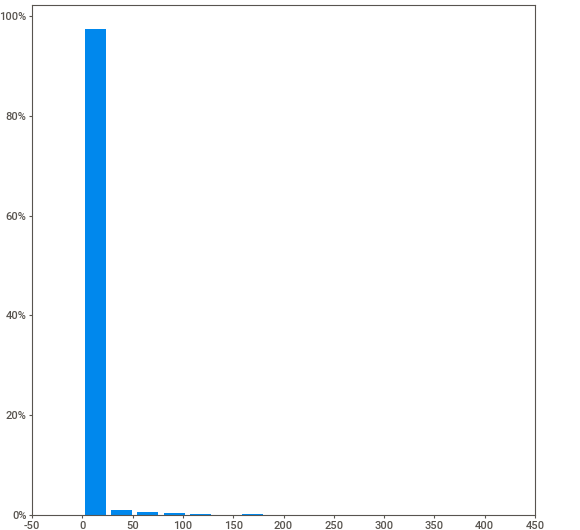
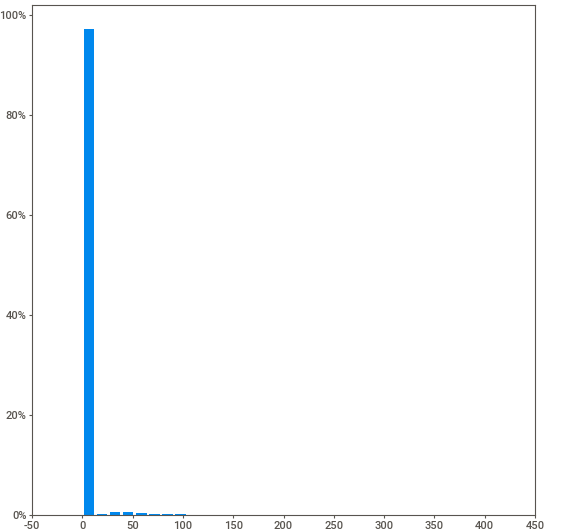
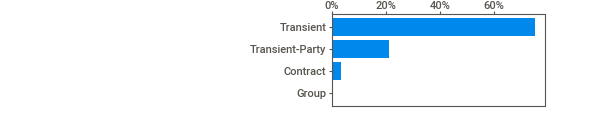
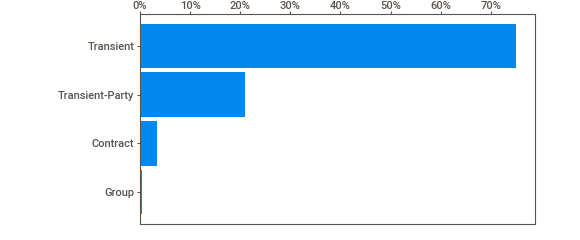
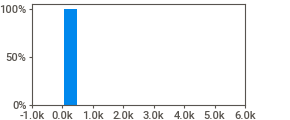
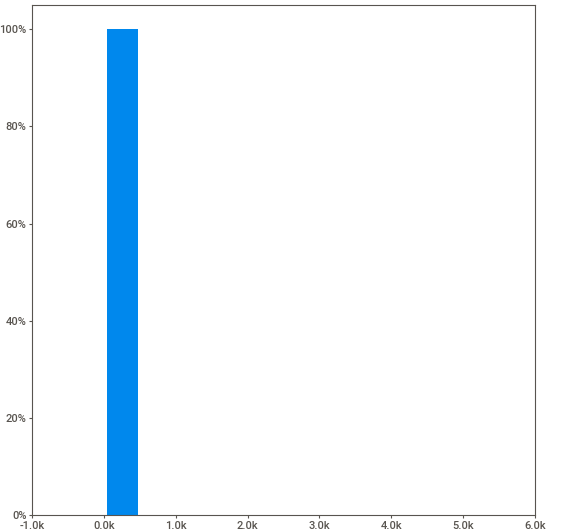
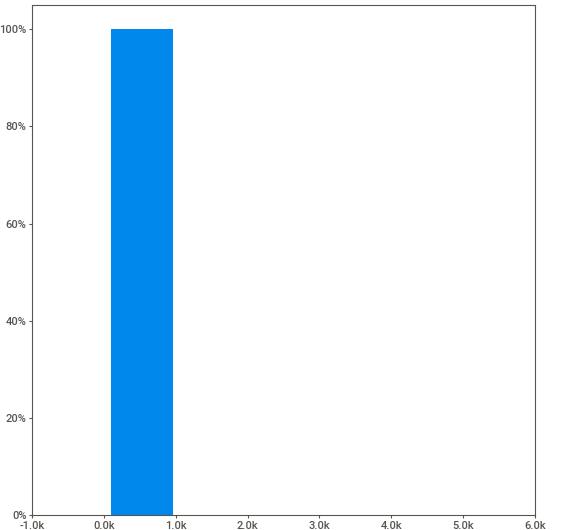
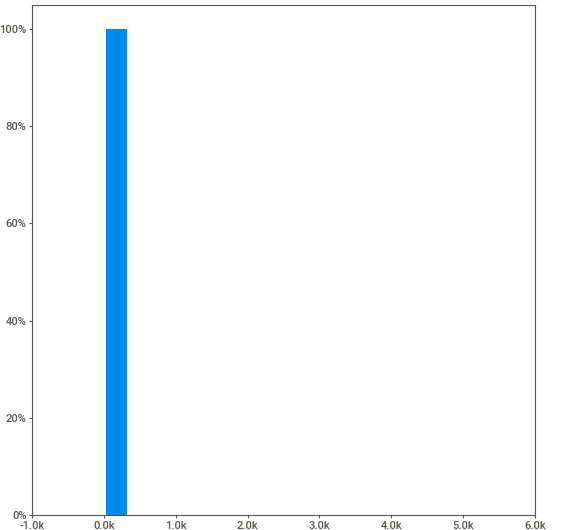
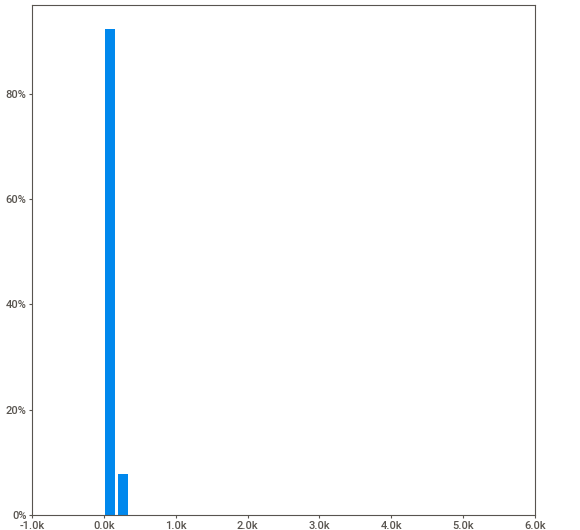
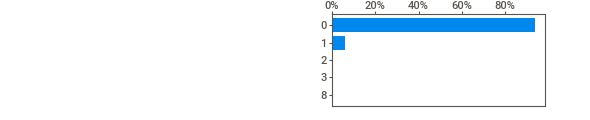
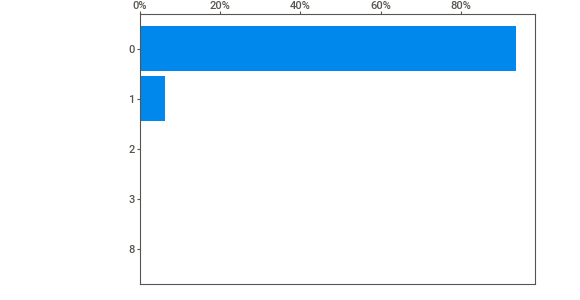
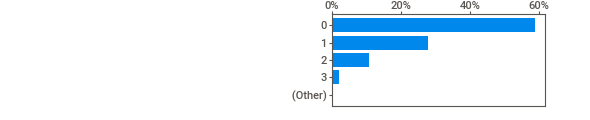
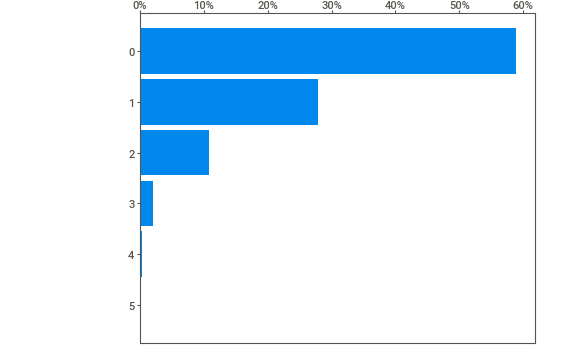
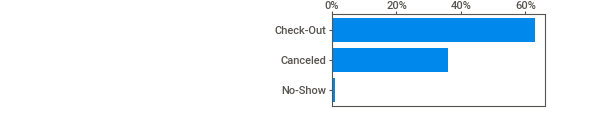
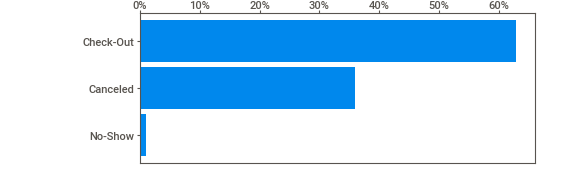
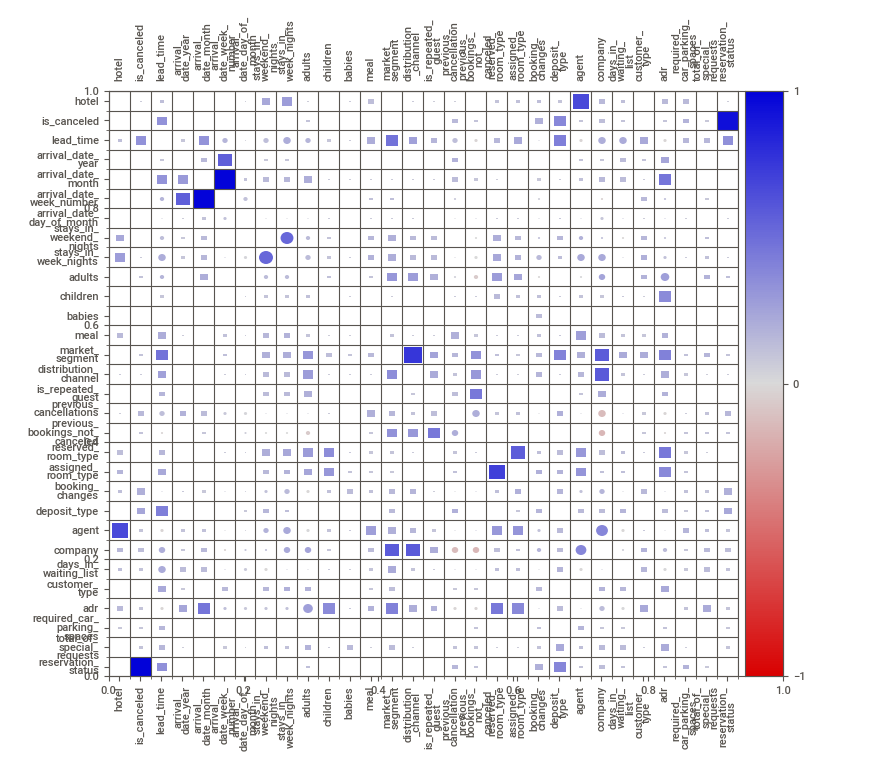
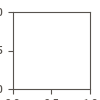

In [4]:
import sweetviz as sv

# Generowanie raportu
report = sv.analyze(dane)
report.show_html("sweetviz_raport.html")
report.show_notebook("sweetviz_raport.html")


In [5]:
def opis(dane, kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q = np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]) , decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]) , decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]) , decimals=2))

In [6]:
def wykres(dane, kolumna, typ_wykresu, x_lab="Typ", y_lab="Ilość", rosnaco=False):
    wykresy = {
        'bar': lambda: dane[kolumna].value_counts().sort_values(ascending=rosnaco).plot(kind='bar'),
        'hist': lambda: dane[kolumna].plot(kind='hist', bins=15),
        'line': lambda: dane[kolumna].plot(kind='line'),
        'box': lambda: dane[kolumna].plot(kind='box'),
    }

    if typ_wykresu in wykresy:
        wykresy[typ_wykresu]() 

    plt.title(f"Wykres {typ_wykresu} dla {kolumna}")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()

In [7]:
opis(dane,'lead_time')

Średnia dla lead_time:  104.01
Odchylenie standardowe dla lead_time:  106.86
Wariancja dla lead_time:  11419.63
Kwantyle dla lead_time:  [ 18.  69. 160.]
Minimum dla lead_time:  0
Maksimum dla lead_time:  737
Mediana dla lead_time:  69.0


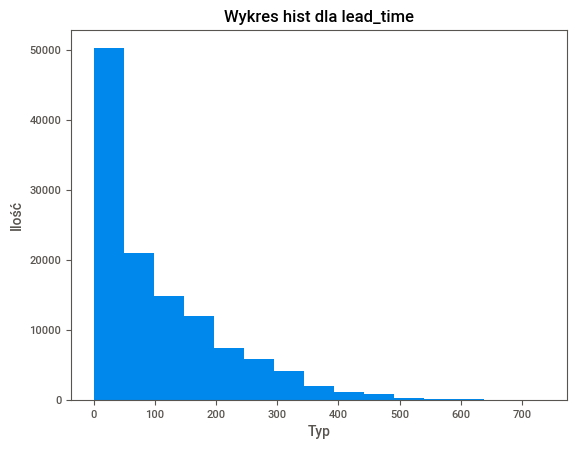

In [8]:
wykres(dane, 'lead_time', 'hist')

In [9]:
for col in dane.columns:
    print(col, dane[col].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 333
company 352
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


In [10]:
dane['children'].value_counts()
dane['adults'].value_counts()
dane['babies'].value_counts()
dane['meal'].value_counts()
dane['country'].value_counts().head(50)
dane['market_segment'].value_counts()
dane['distribution_channel'].value_counts()
dane['reserved_room_type'].value_counts()
dane['assigned_room_type'].value_counts()
dane['deposit_type'].value_counts()
dane['customer_type'].value_counts()
dane['reservation_status'].value_counts()
dane['reservation_status_date'].value_counts()

reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: count, Length: 926, dtype: int64

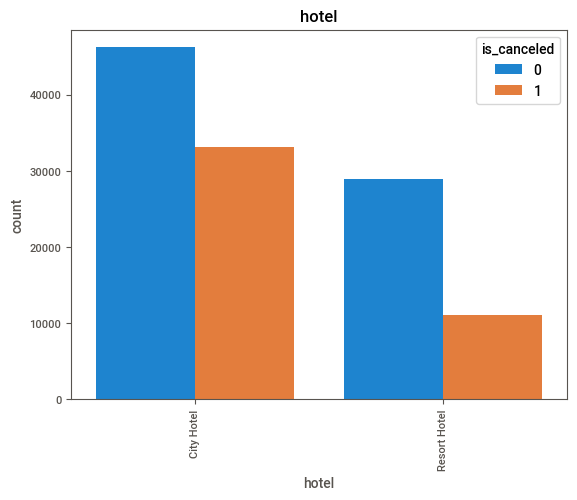

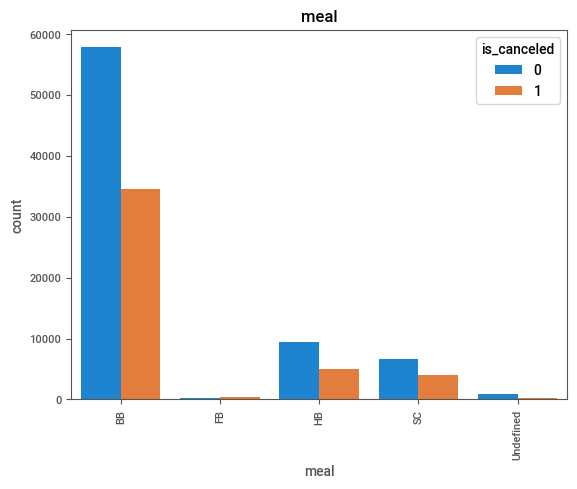

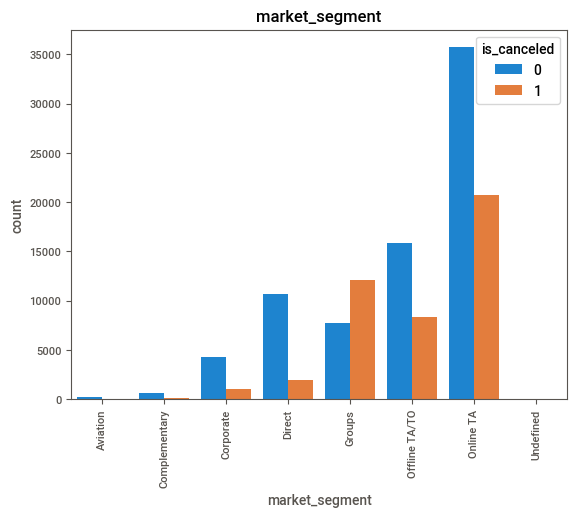

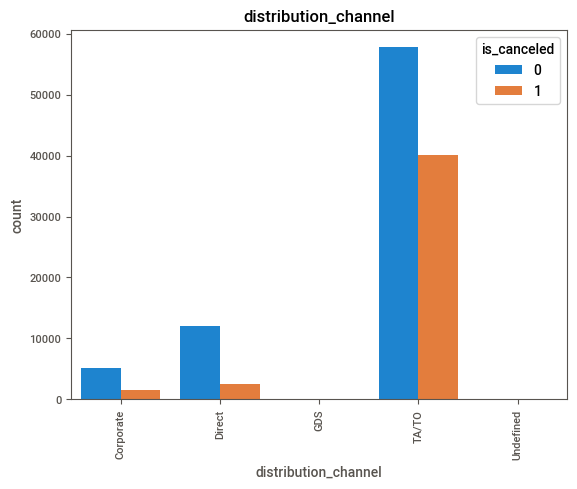

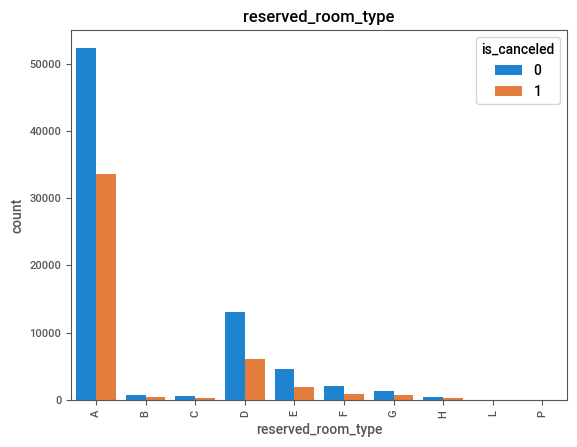

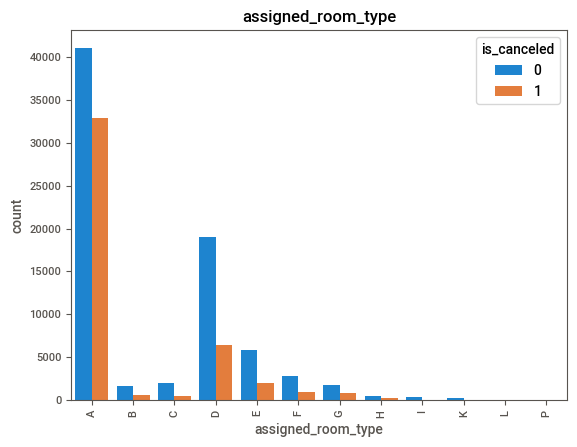

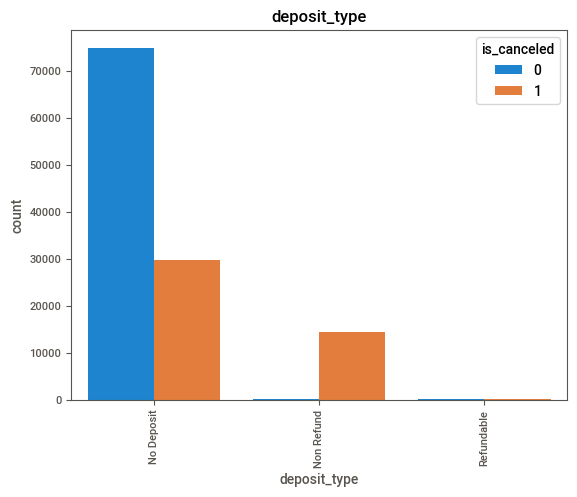

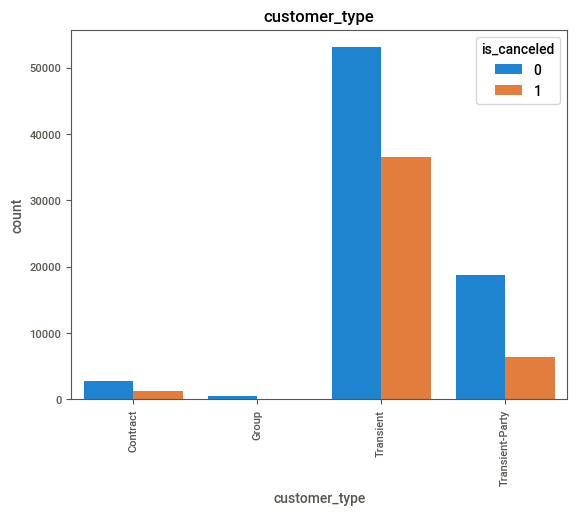

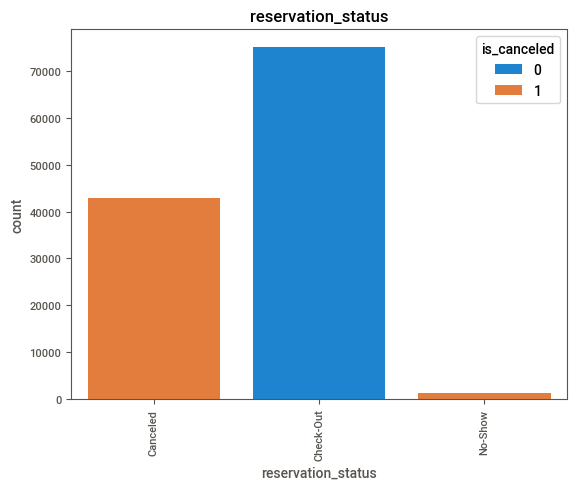

2024-12-30 13:35:01,565 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:01,630 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


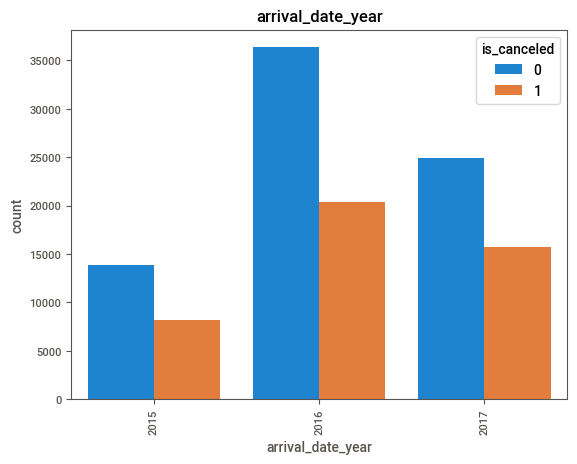

2024-12-30 13:35:01,765 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:01,820 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


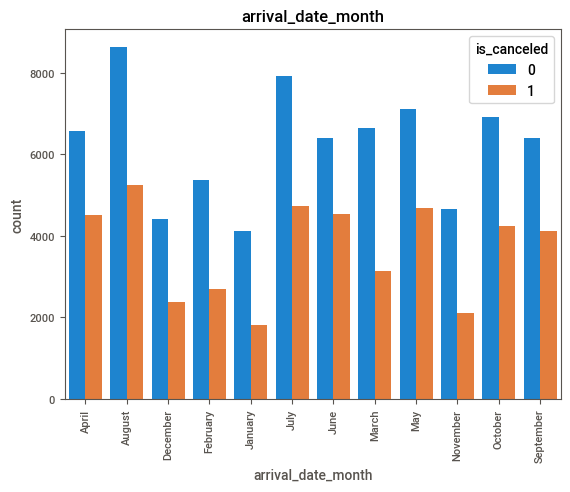

2024-12-30 13:35:01,990 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:02,040 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


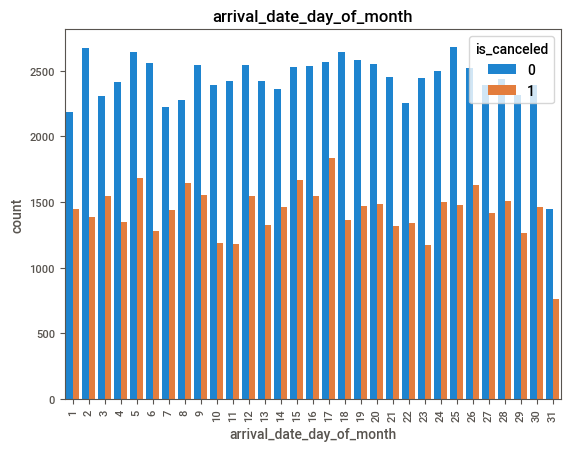

2024-12-30 13:35:02,275 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:02,317 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


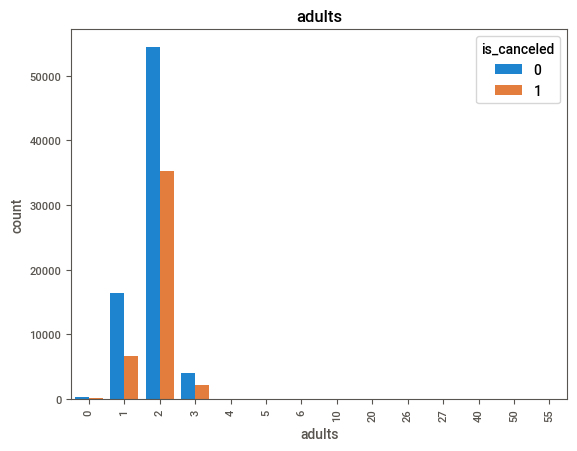

2024-12-30 13:35:02,497 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:02,545 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


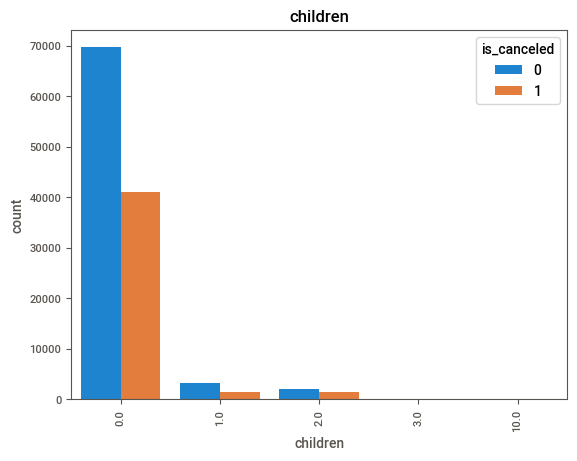

2024-12-30 13:35:02,690 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:02,739 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


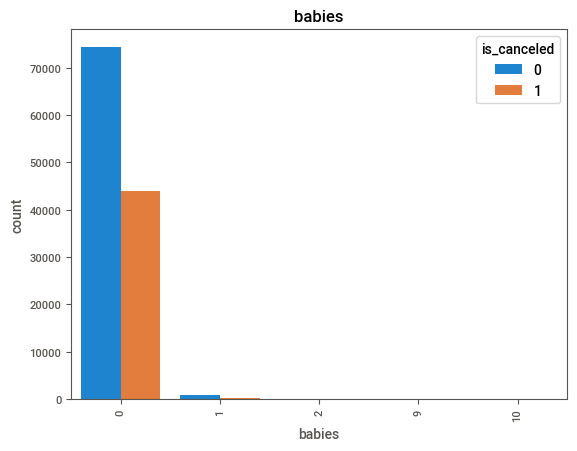

2024-12-30 13:35:02,888 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:35:02,941 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


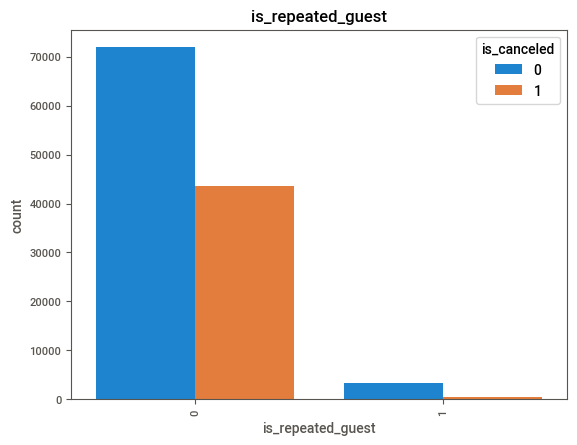

In [31]:
all_columns = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
               'reserved_room_type', 'assigned_room_type', 
               'deposit_type', 'customer_type', 'reservation_status',
               'arrival_date_year', 'arrival_date_month', 
               'arrival_date_day_of_month', 'adults', 'children', 
               'babies', 'is_repeated_guest']

for col in all_columns:
    sns.countplot(x=dane[col].astype('category'), hue=dane['is_canceled'])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()


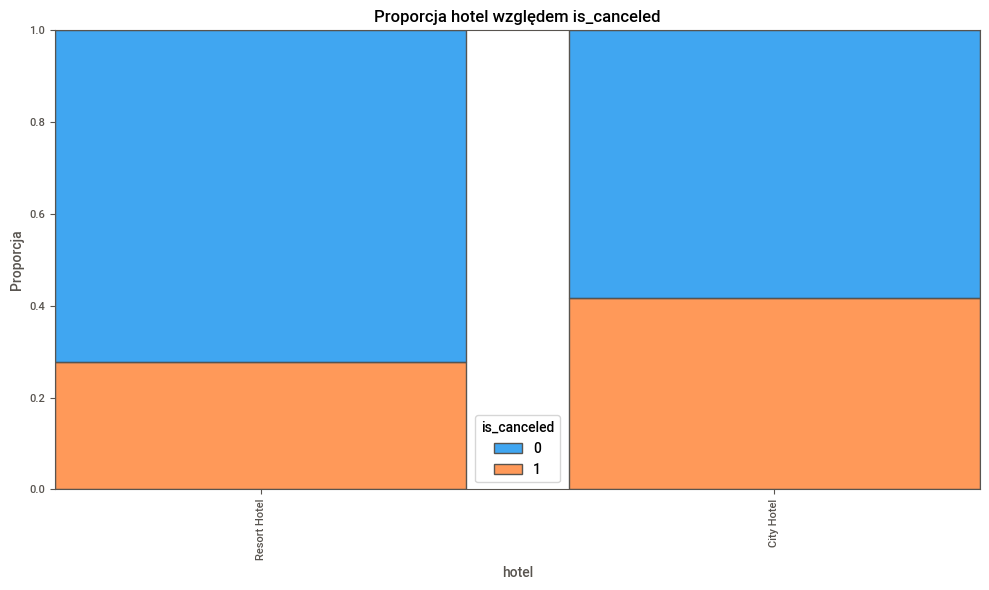

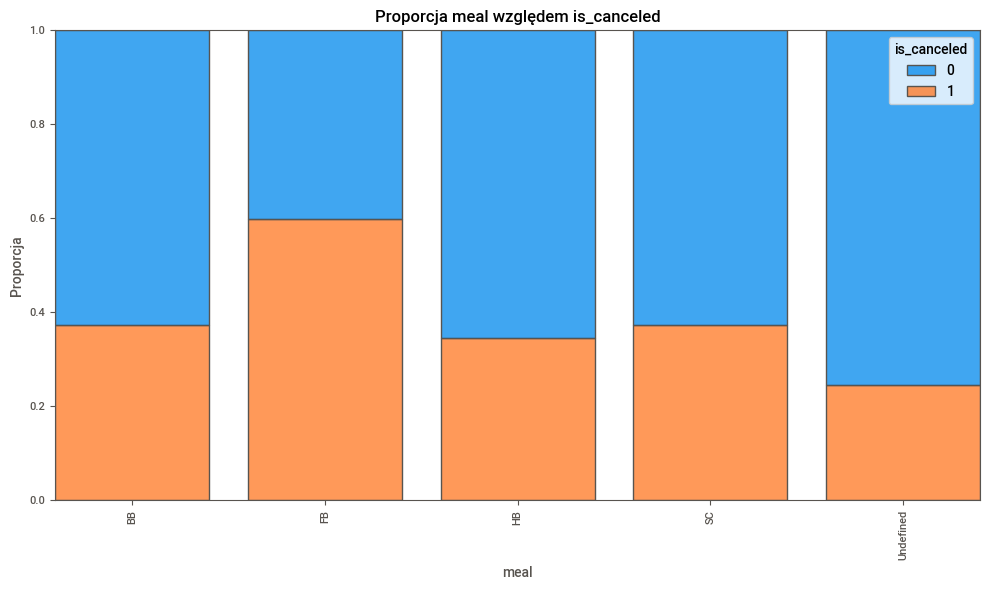

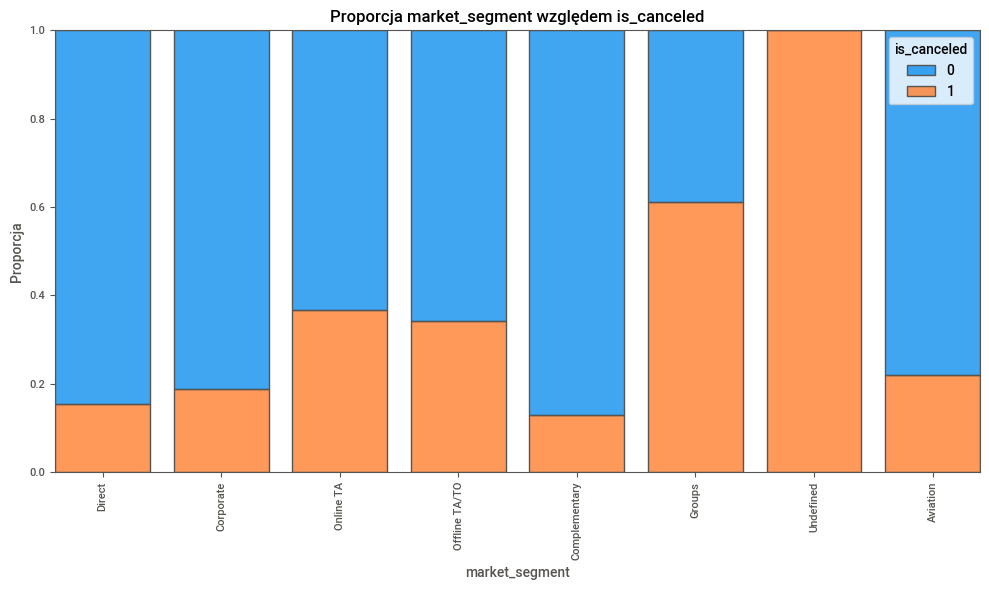

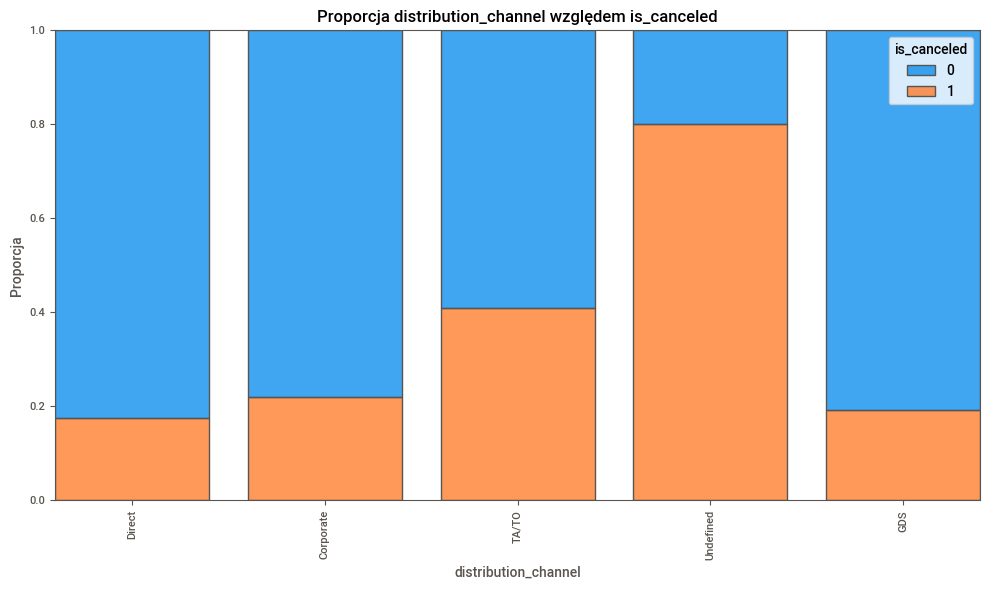

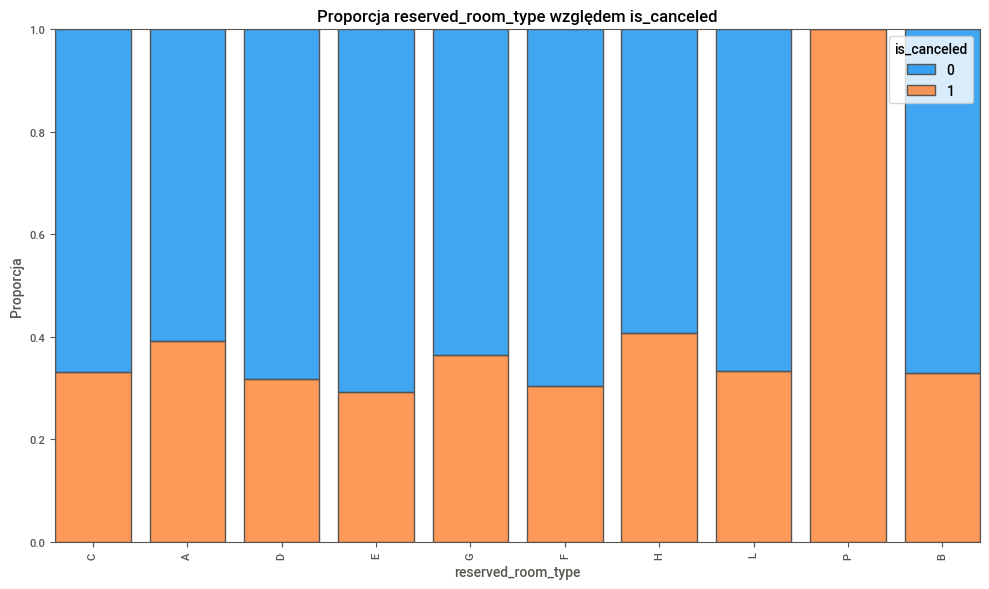

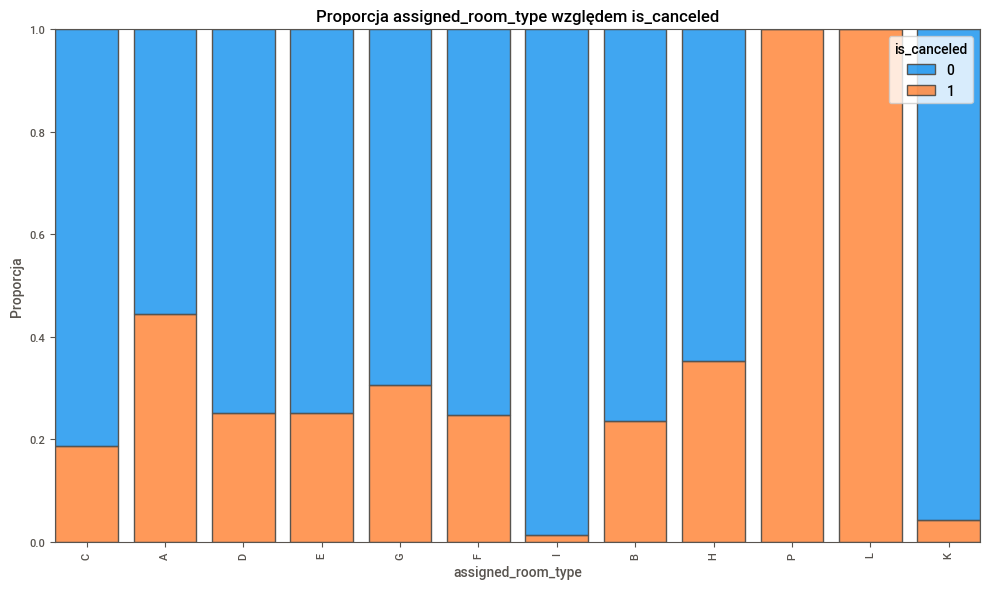

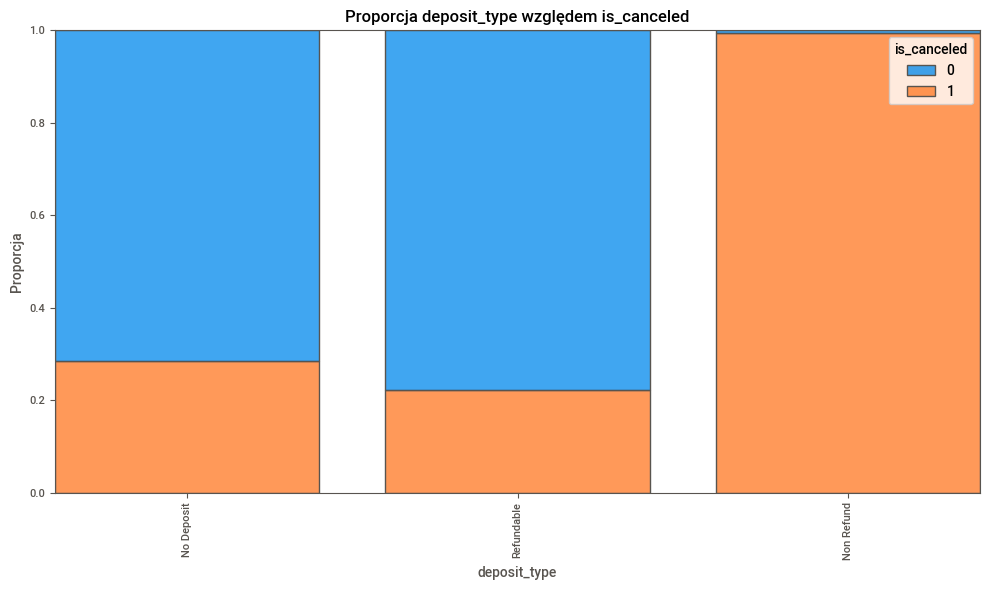

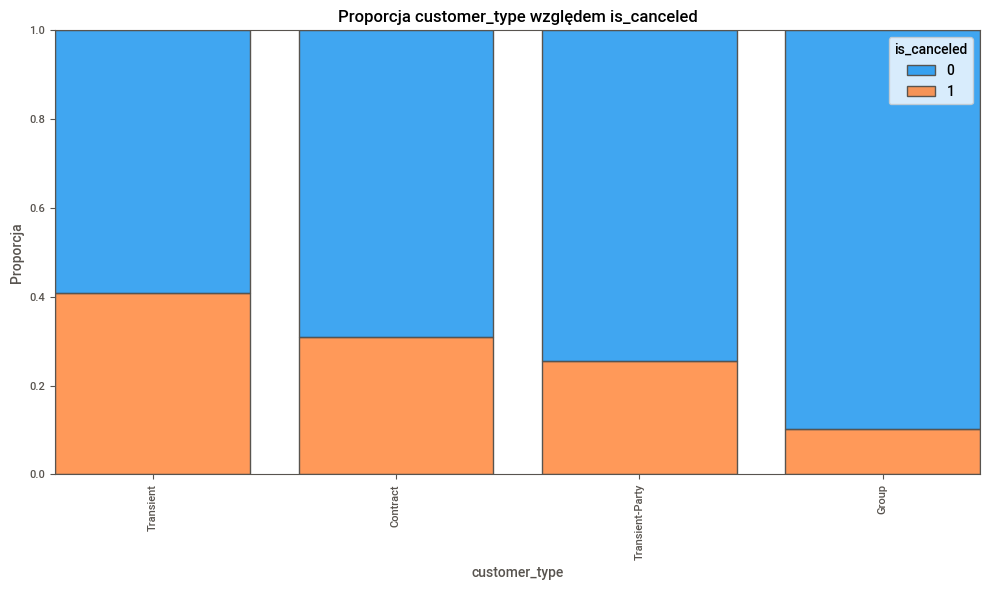

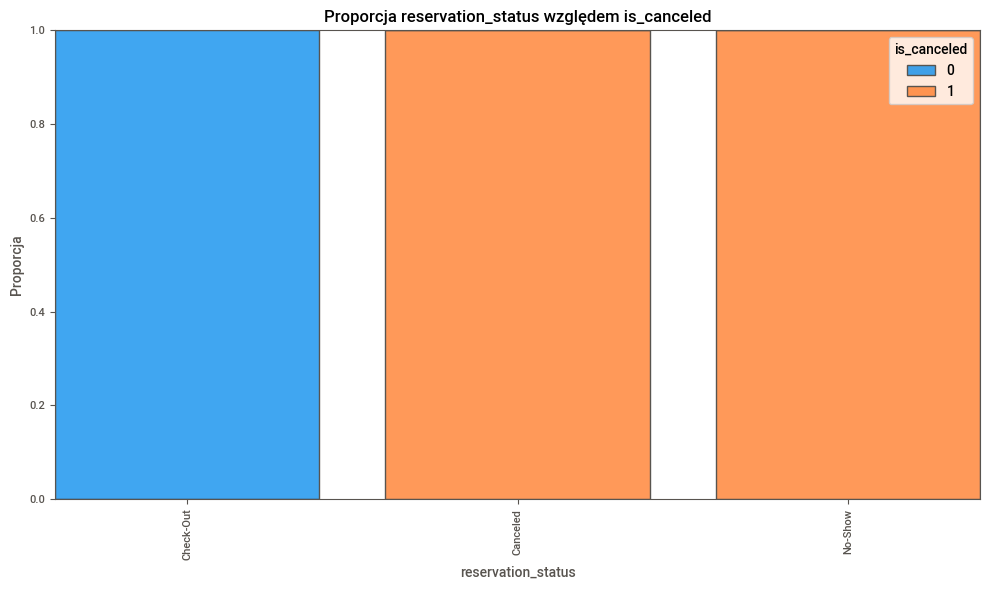

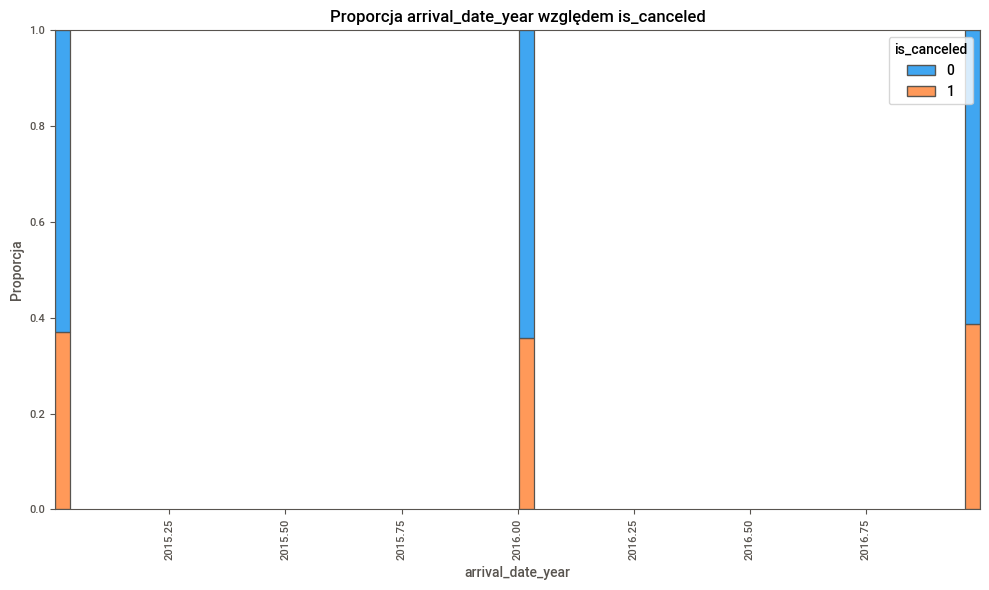

2024-12-30 13:17:16,763 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:17:16,822 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


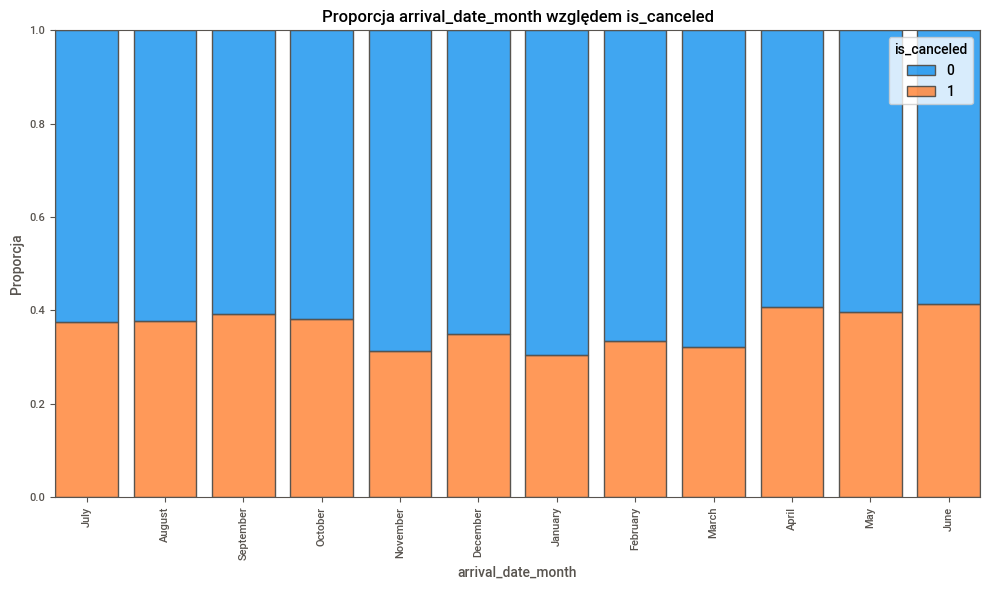

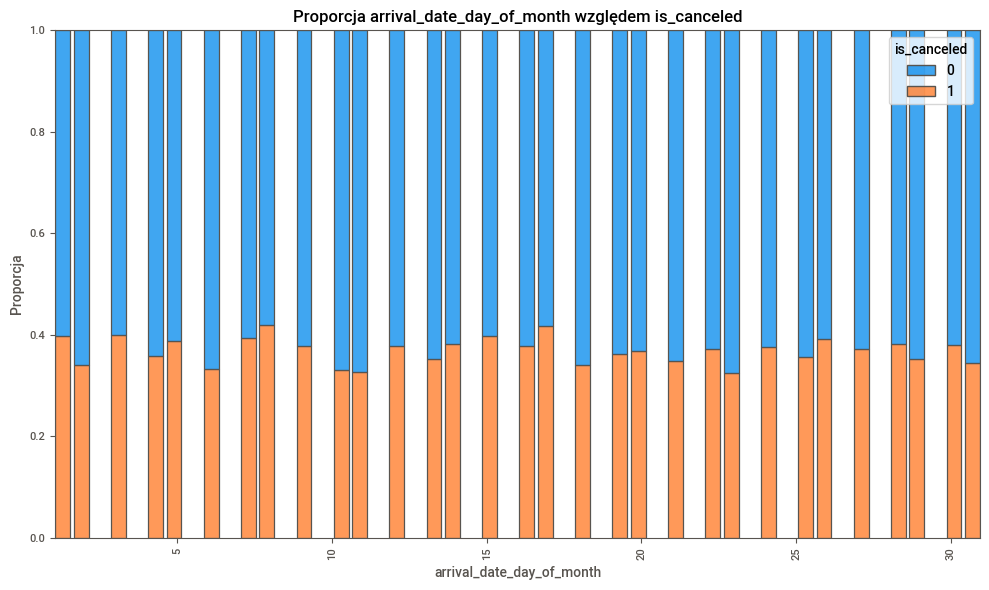

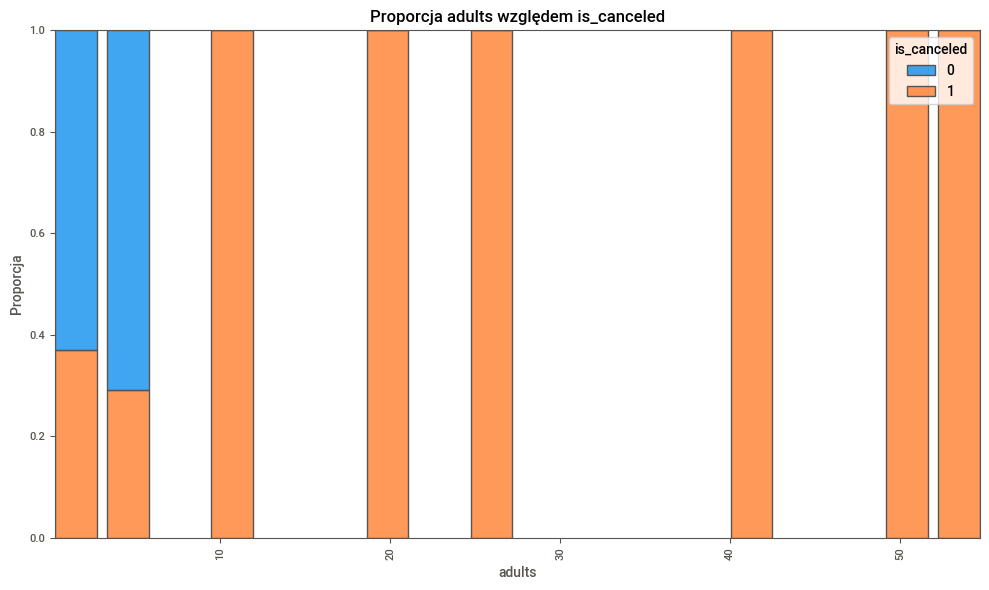

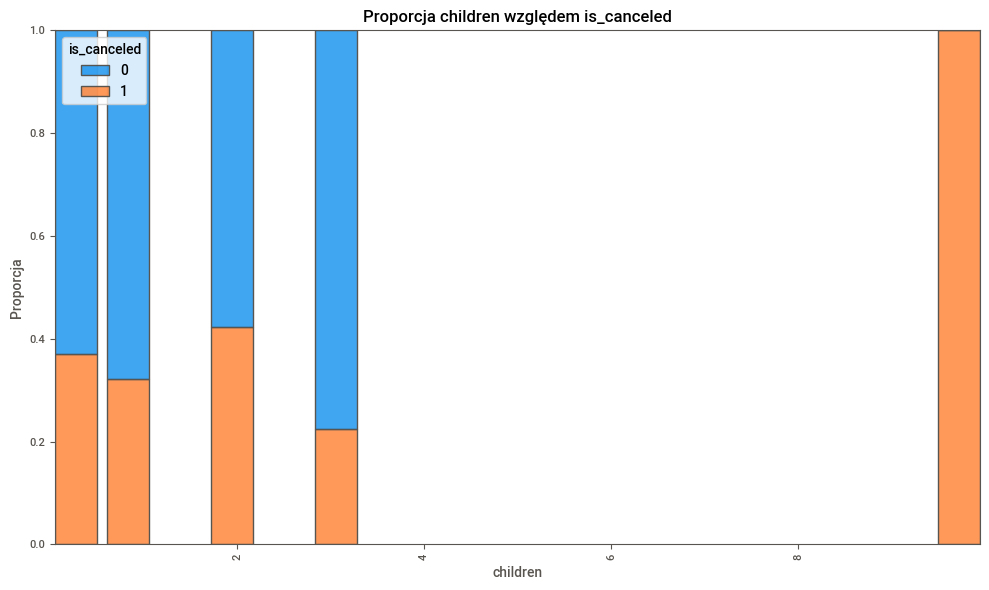

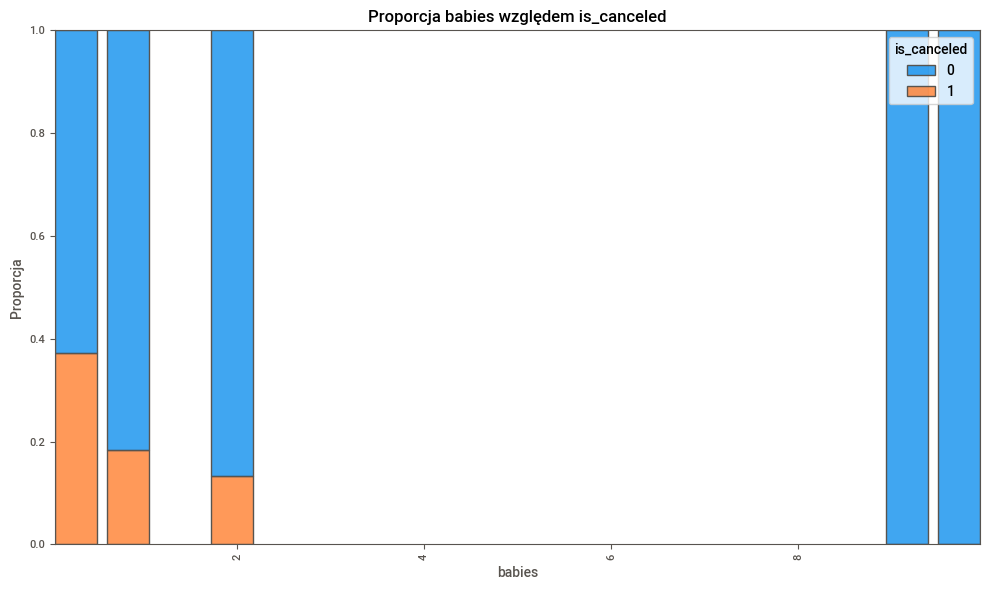

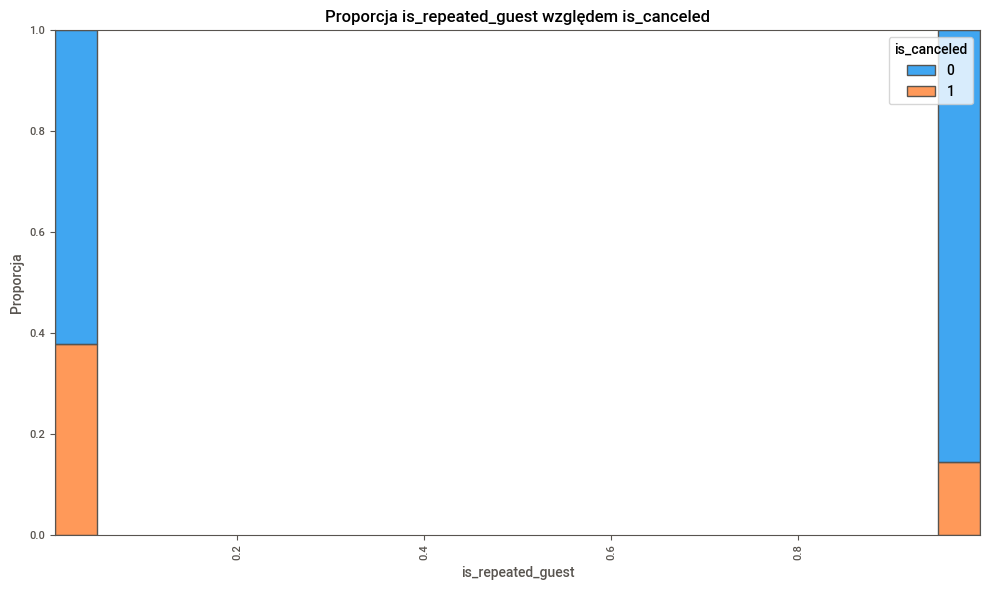

In [12]:
for col in all_columns:
    
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=dane,
        x=col,
        hue='is_canceled',
        multiple='fill',  
        stat='probability',
        shrink=0.8
    )
    plt.title(f'Proporcja {col} względem is_canceled')
    plt.xticks(rotation=90)
    plt.ylabel('Proporcja')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


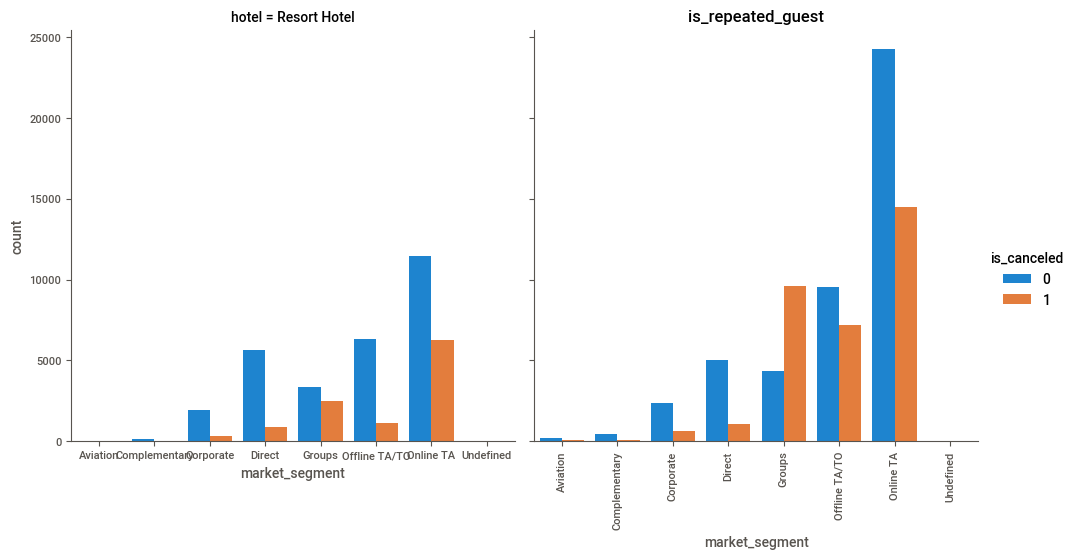

In [13]:
sns.catplot(x=dane['market_segment'].astype('category'), hue=dane['is_canceled'], col='hotel', kind='count', data=dane)
plt.title(col)
plt.xticks(rotation=90)
plt.show()

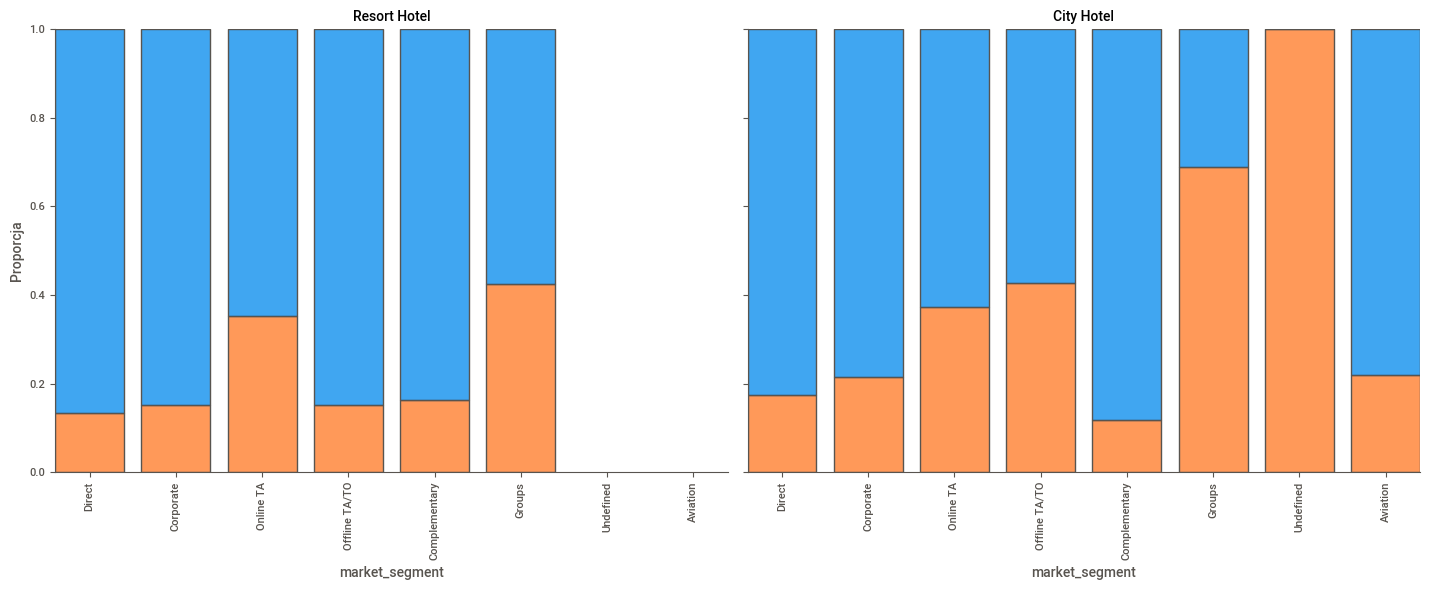

In [14]:
g = sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2)
g.map_dataframe(
    sns.histplot,
    x='market_segment',
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.8
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("market_segment", "Proporcja")
plt.tight_layout()
plt.show()

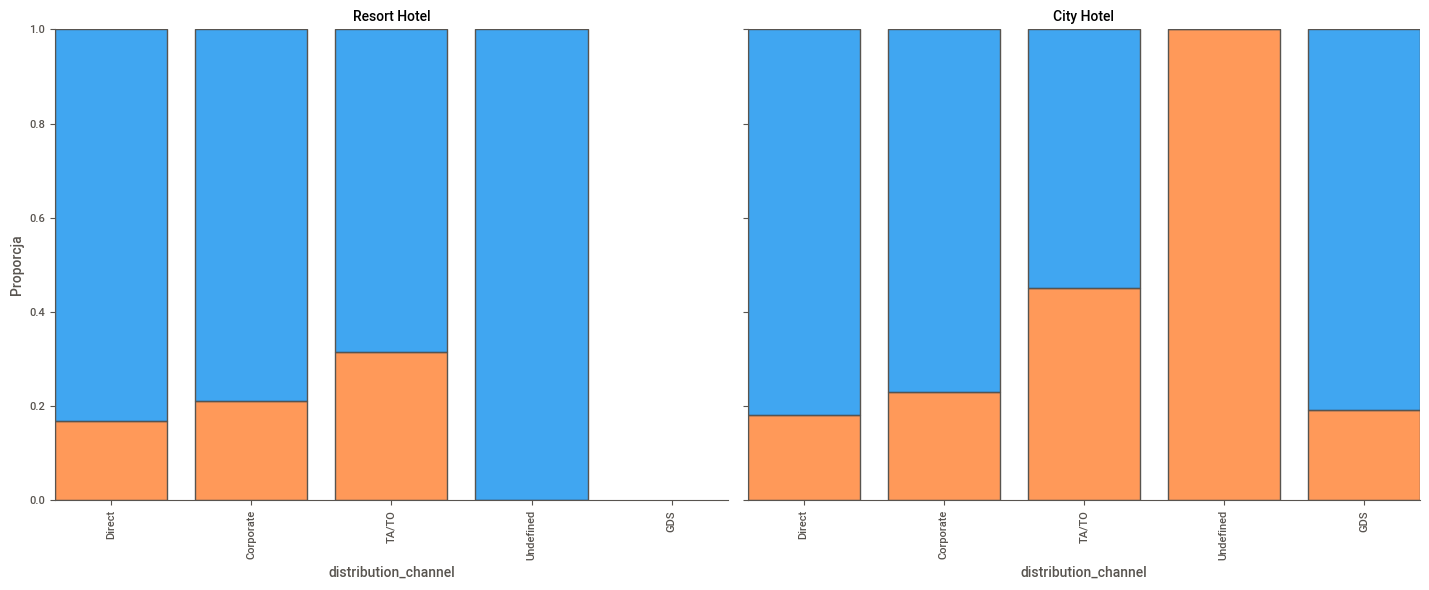

In [15]:
g = sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2)
g.map_dataframe(
    sns.histplot,
    x='distribution_channel',
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.8
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("distribution_channel", "Proporcja")
plt.tight_layout()
plt.show()

### Statystyki opisowe 

1. arrival_date_year, arrival_date_month, arrival_date_day_of_month (arrival_date)

2024-12-30 14:39:54,762 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 14:39:54,810 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 14:39:54,929 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 14:39:54,995 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


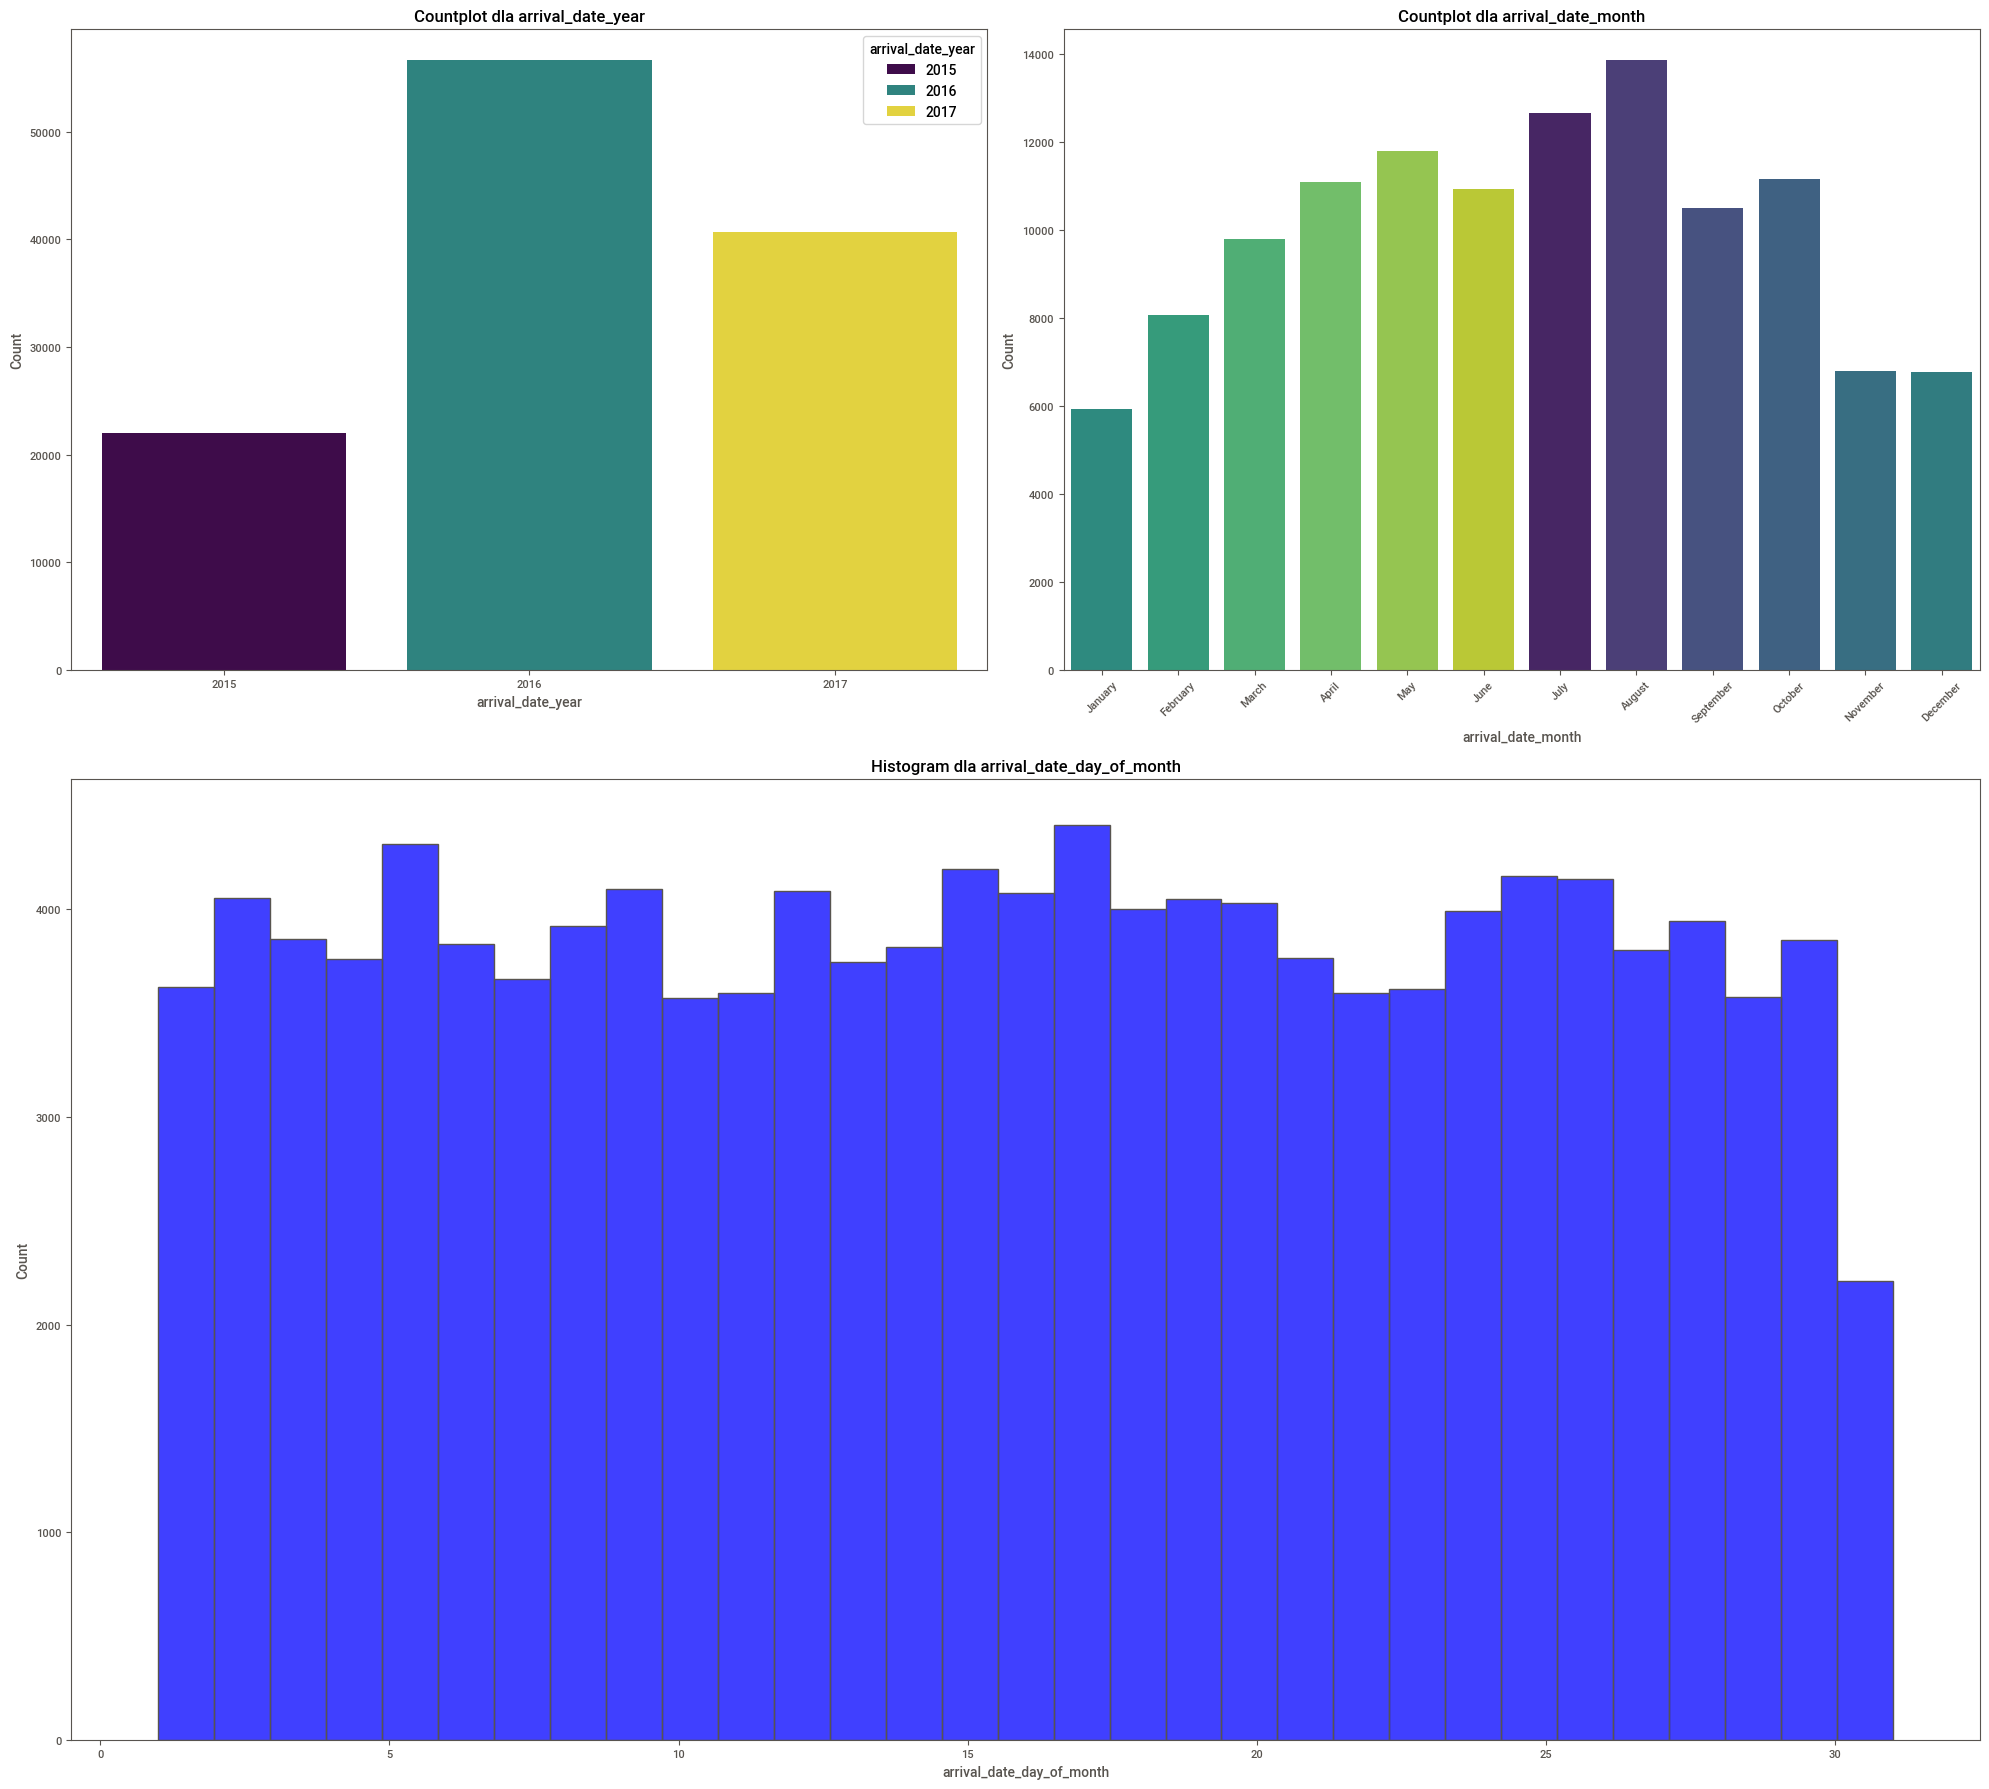

In [52]:
fig = plt.figure(figsize=(20, 18))
gs = GridSpec(2, 2, height_ratios=[1, 1.5])

# First countplot
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(
    ax=ax1,
    x=dane['arrival_date_year'],
    hue=dane['arrival_date_year'],
    palette='viridis'
)
ax1.set_title('Countplot dla arrival_date_year')
ax1.set_xlabel('arrival_date_year')
ax1.set_ylabel('Count')

# Second countplot
ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(
    ax=ax2,
    x=dane['arrival_date_month'],
    hue=dane['arrival_date_month'],
    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    palette='viridis'
)
ax2.set_title('Countplot dla arrival_date_month')
ax2.set_xlabel('arrival_date_month')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# Histogram
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(
    ax=ax3,
    x=dane['arrival_date_day_of_month'],
    bins=31,
    color='blue'
)
ax3.set_title('Histogram dla arrival_date_day_of_month')
ax3.set_xlabel('arrival_date_day_of_month')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

2024-12-30 13:44:46,439 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:44:46,447 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:44:46,530 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:44:46,539 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


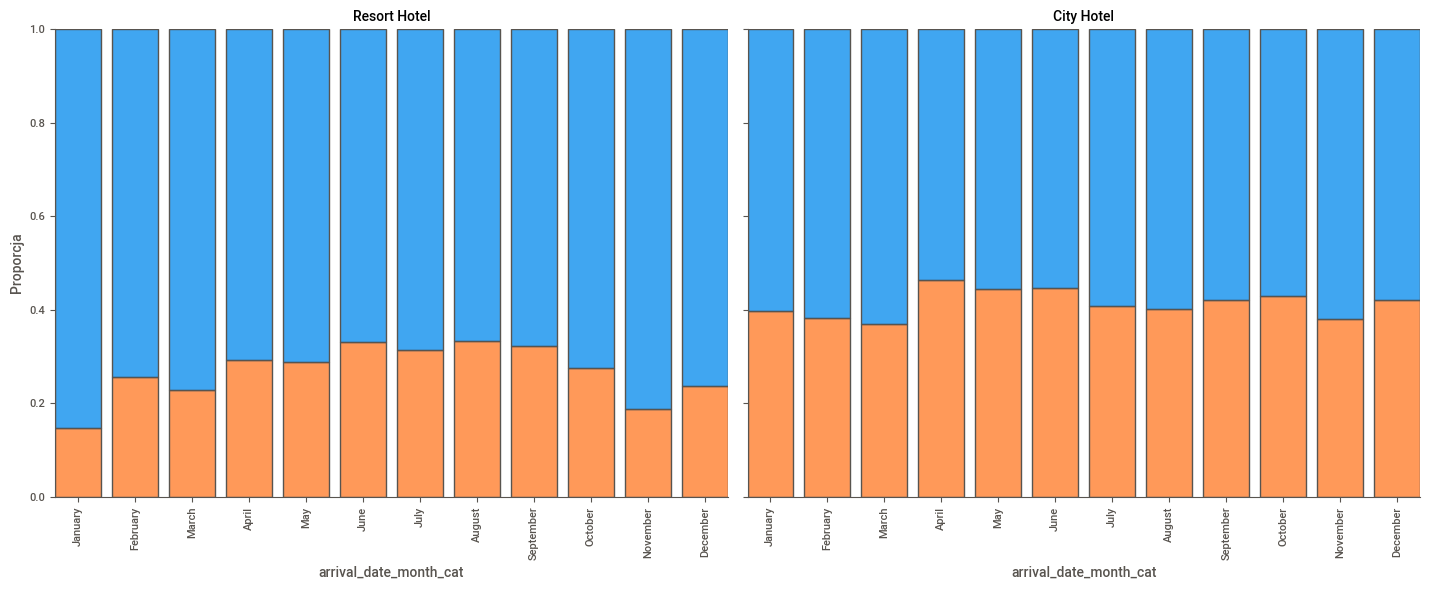

In [ ]:

arrival_date_month_cat = pd.Categorical(dane['arrival_date_month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)dane['arrival_date_month_cat'] = arrival_date_month_cat

g = sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2)
g.map_dataframe(
    sns.histplot,
    x='arrival_date_month_cat',
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.8
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("arrival_date_month_cat", "Proporcja")
plt.tight_layout()
plt.show()

2024-12-30 13:50:26,866 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:50:26,881 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:50:26,997 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 13:50:27,027 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


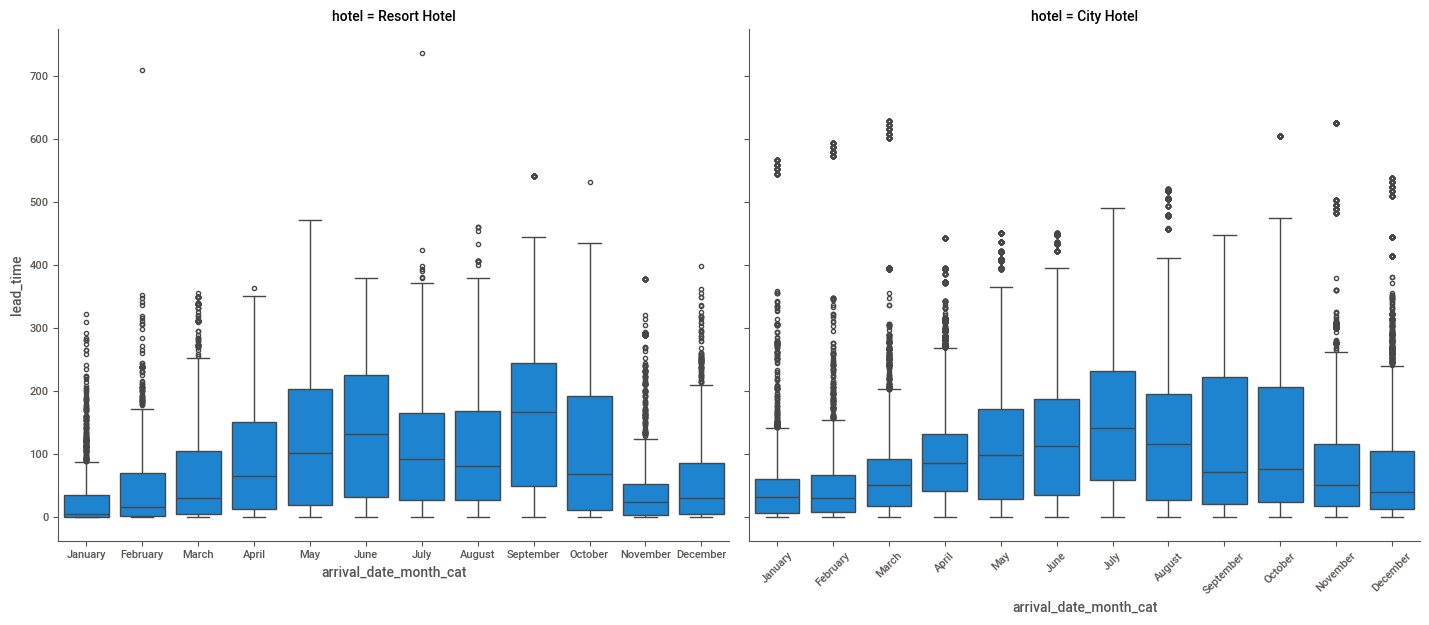

In [ ]:
sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2).map_dataframe(sns.boxplot, x='arrival_date_month_cat', y='lead_time')
plt.xticks(rotation=45)
plt.show()

2024-12-30 14:53:07,940 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 14:53:07,957 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 14:53:08,080 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 14:53:08,113 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


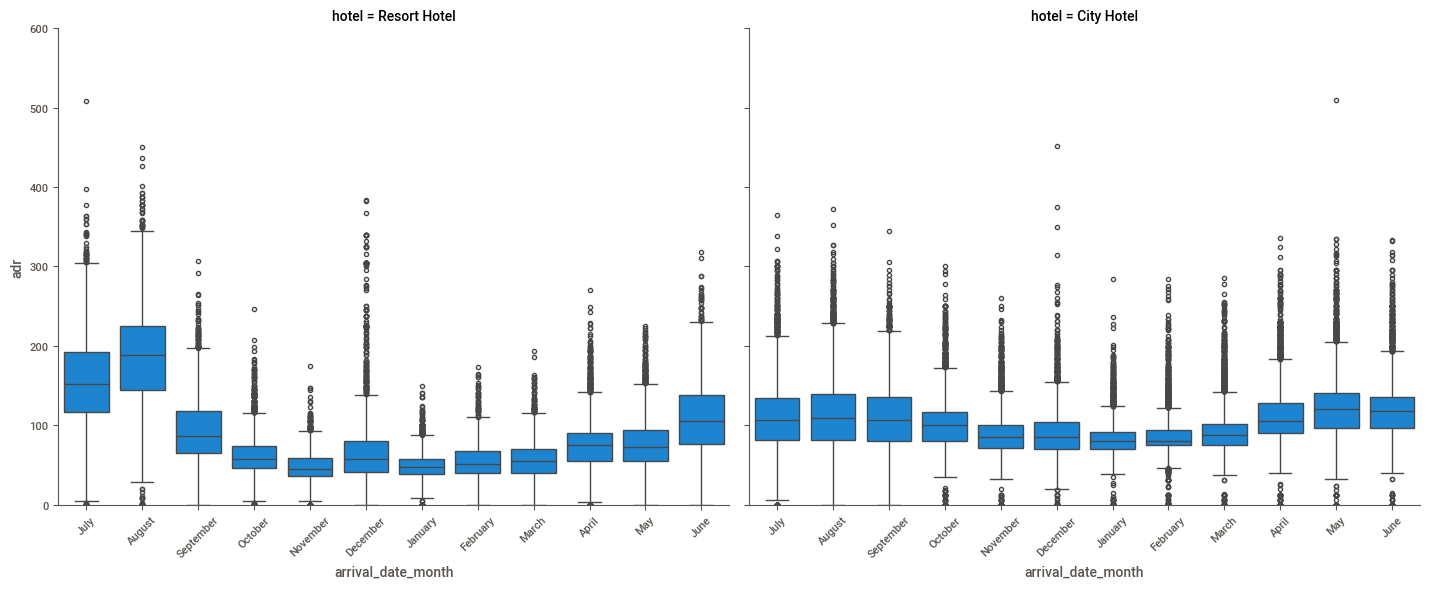

In [56]:
g = sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2)
g.map_dataframe(sns.boxplot, x='arrival_date_month', y='adr')
g.set(ylim=(0, 600))
g.set_xticklabels(rotation=45)
g.set_axis_labels("arrival_date_month", "adr")
plt.tight_layout()
plt.show()

2024-12-30 15:05:37,426 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 15:05:37,447 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


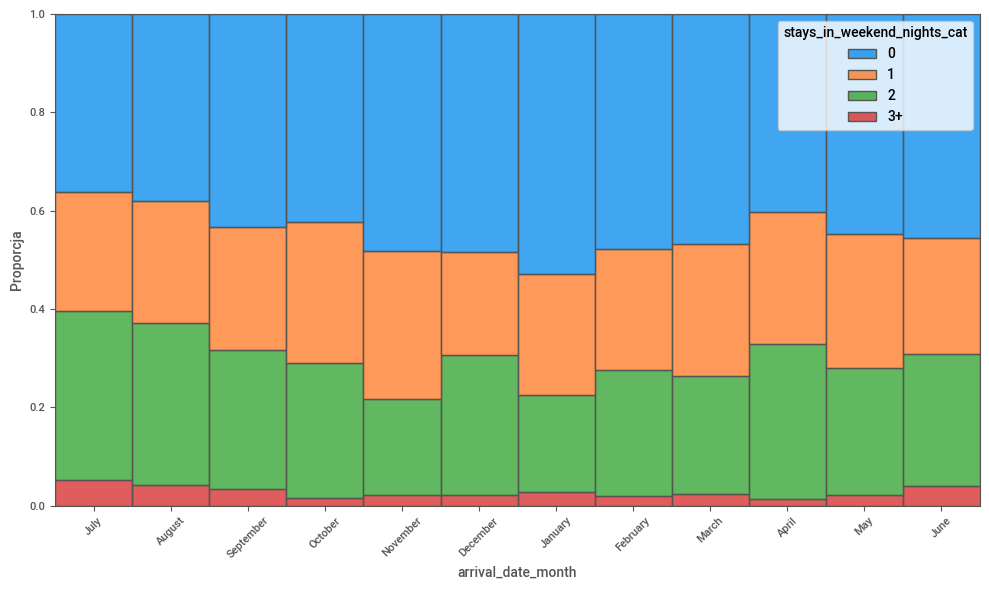

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new categorical variable with four groups
dane['stays_in_weekend_nights_cat'] = pd.cut(
    dane['stays_in_weekend_nights'],
    bins=[-1, 0, 1, 2, float('inf')],
    labels=['0', '1', '2', '3+']
)

plt.figure(figsize=(10, 6))
histplot = sns.histplot(
    data=dane,
    x='arrival_date_month',
    hue='stays_in_weekend_nights_cat',
    multiple='fill',
    stat='probability'
)
plt.xticks(rotation=45)
plt.xlabel("arrival_date_month")
plt.ylabel("Proporcja")
histplot.legend_.set_title("stays_in_weekend_nights_cat")
plt.tight_layout()
plt.show()

2024-12-30 15:06:44,878 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-30 15:06:44,901 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


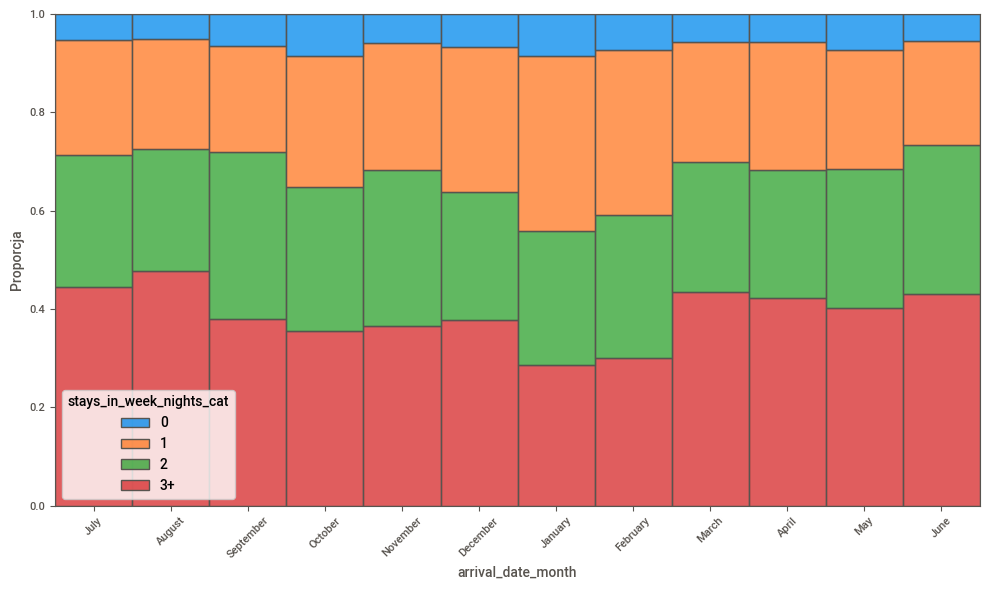

In [70]:
dane['stays_in_week_nights_cat'] = pd.cut(
    dane['stays_in_week_nights'],
    bins=[-1, 0, 1, 2, float('inf')],
    labels=['0', '1', '2', '3+']
)

plt.figure(figsize=(10, 6))
histplot = sns.histplot(
    data=dane,
    x='arrival_date_month',
    hue='stays_in_week_nights_cat',
    multiple='fill',
    stat='probability'
)
plt.xticks(rotation=45)
plt.xlabel("arrival_date_month")
plt.ylabel("Proporcja")
histplot.legend_.set_title("stays_in_week_nights_cat")
plt.tight_layout()
plt.show()

In [ ]:
arrival_date = pd.to_datetime(dane[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))
plt.figure(figsize=(10, 6))
sns.histplot(arrival_date, bins=24)

plt.axvline(pd.to_datetime('2015-12-31'), color='r', linestyle='--', label='Koniec 2015')
plt.axvline(pd.to_datetime('2016-12-31'), color='b', linestyle='--', label='Koniec 2016')

plt.legend()
plt.show()

In [85]:
dane[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].dtypes

arrival_date_year             int64
arrival_date_month           object
arrival_date_day_of_month     int64
dtype: object

In [77]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

dane['arrival_date_month_num'] = dane['arrival_date_month'].map(month_mapping)
print(dane[['arrival_date_year', 'arrival_date_month_num', 'arrival_date_day_of_month']].describe())

       arrival_date_year  arrival_date_month_num  arrival_date_day_of_month
count      119390.000000           119390.000000              119390.000000
mean         2016.156554                6.552483                  15.798241
std             0.707476                3.090619                   8.780829
min          2015.000000                1.000000                   1.000000
25%          2016.000000                4.000000                   8.000000
50%          2016.000000                7.000000                  16.000000
75%          2017.000000                9.000000                  23.000000
max          2017.000000               12.000000                  31.000000


In [78]:
dane[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].isna().sum()

arrival_date_year            0
arrival_date_month           0
arrival_date_day_of_month    0
dtype: int64

In [80]:
columns_to_remove = ['arrival_date_month_cat', 'stays_in_weekend_nights_cat', 'stays_in_week_nights_cat', 'arrival_date_month_num']
dane.drop(columns=columns_to_remove, inplace=True)

KeyError: "['arrival_date_month_cat', 'stays_in_weekend_nights_cat', 'stays_in_week_nights_cat', 'arrival_date_month_num'] not found in axis"

stays_in_weekend_nights, stays_in_week_nights (stays_in_total_nights)

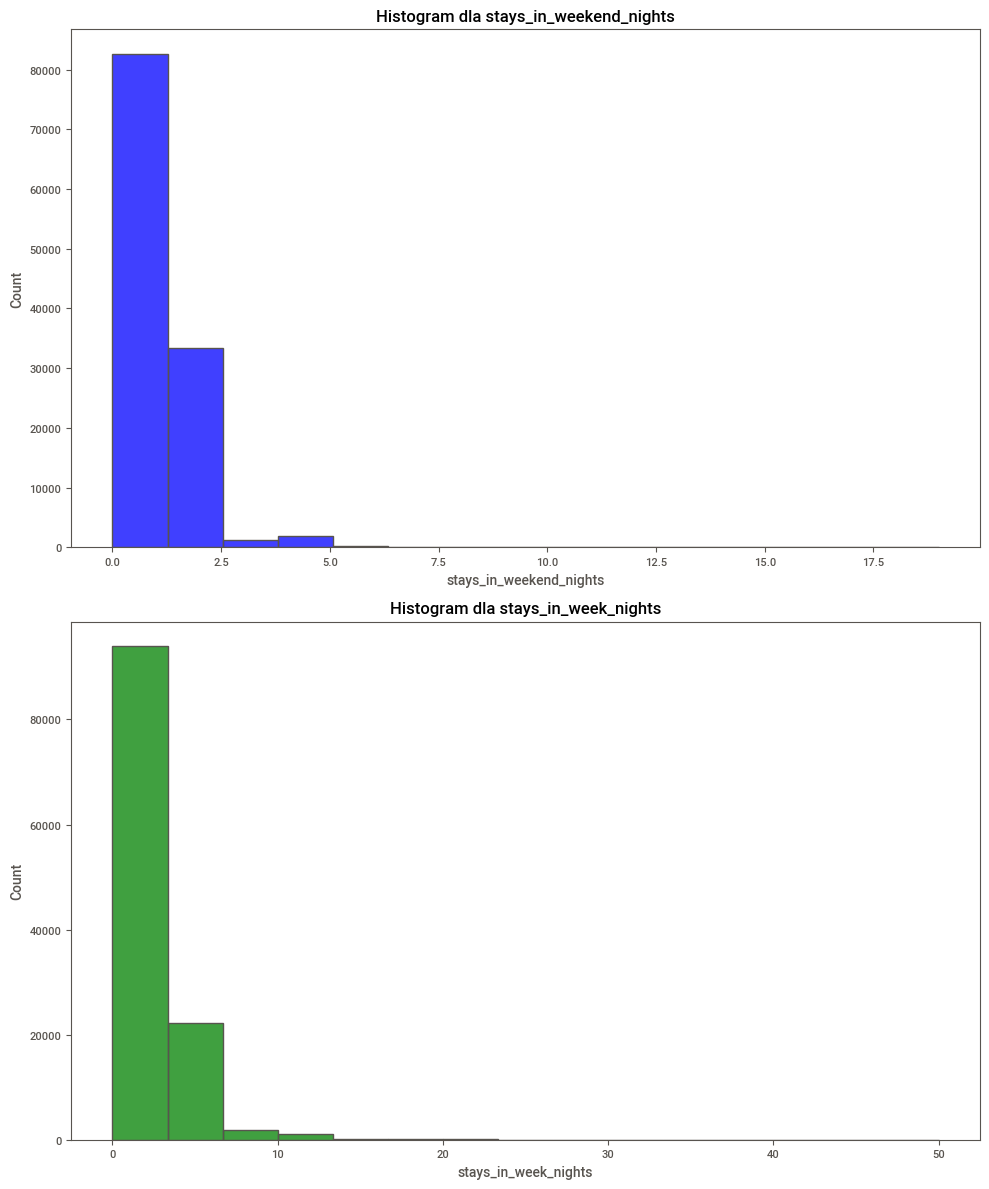

In [84]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(dane['stays_in_weekend_nights'], bins=15, ax=ax1, color='blue')
ax1.set_title('Histogram dla stays_in_weekend_nights')
ax1.set_xlabel('stays_in_weekend_nights')
ax1.set_ylabel('Count')

sns.histplot(dane['stays_in_week_nights'], bins=15, ax=ax2, color='green')
ax2.set_title('Histogram dla stays_in_week_nights')
ax2.set_xlabel('stays_in_week_nights')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\Jan-M\AppData\Local\Temp\ipykernel_25060\546794777.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




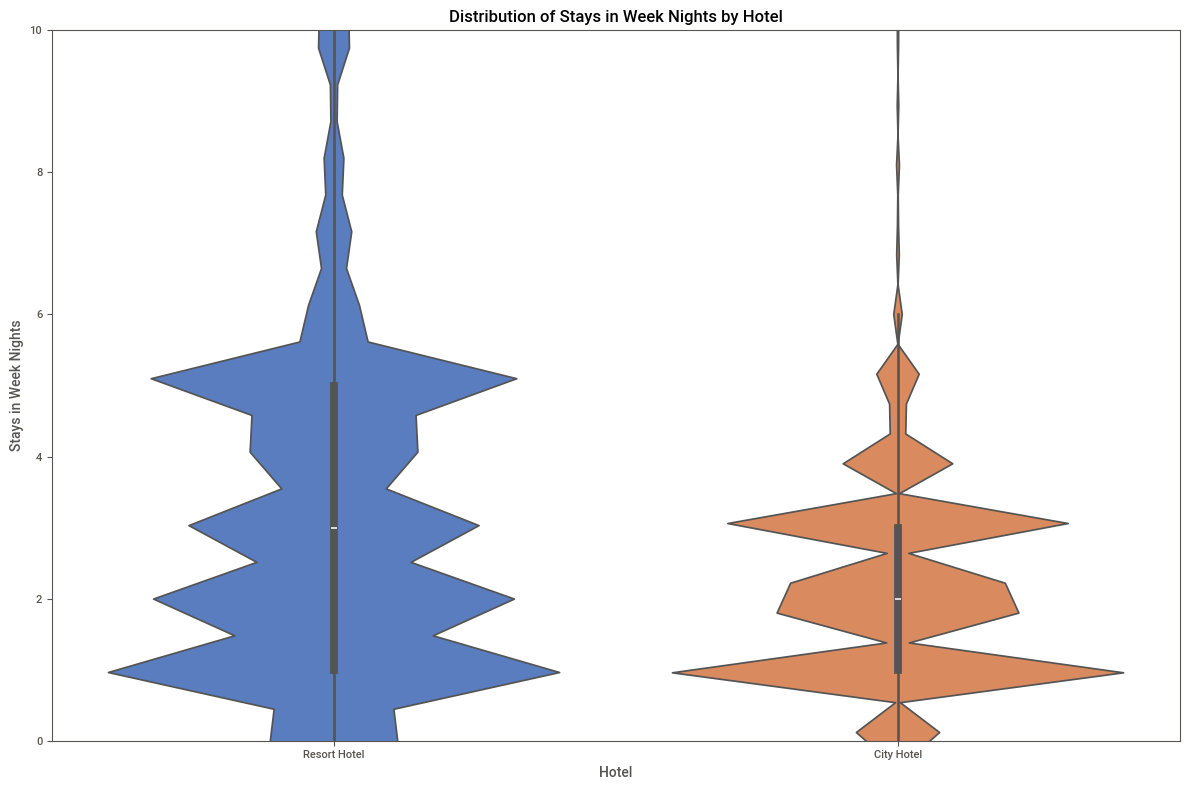

In [94]:
plt.figure(figsize=(12, 8))
g = sns.violinplot(
    data=dane,
    x='hotel',
    y='stays_in_week_nights',
    palette='muted'
)
g.set(ylim=(0, 10))
g.set_title('Distribution of Stays in Week Nights by Hotel')
g.set_xlabel('Hotel')
g.set_ylabel('Stays in Week Nights')

plt.tight_layout()
plt.show()

C:\Users\Jan-M\AppData\Local\Temp\ipykernel_25060\1312516489.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




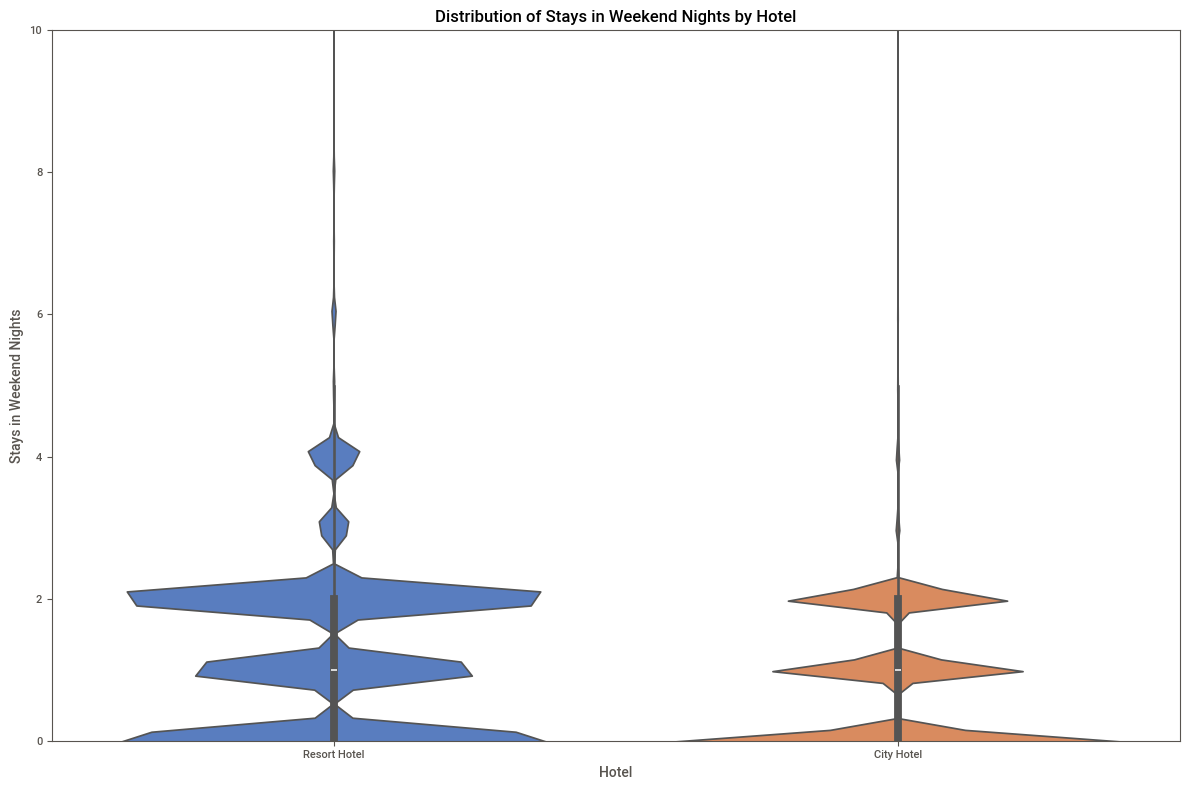

In [95]:
plt.figure(figsize=(12, 8))
g = sns.violinplot(
    data=dane,
    x='hotel',
    y='stays_in_weekend_nights',
    palette='muted'
)
g.set(ylim=(0, 10))
g.set_title('Distribution of Stays in Weekend Nights by Hotel')
g.set_xlabel('Hotel')
g.set_ylabel('Stays in Weekend Nights')

plt.tight_layout()
plt.show()

<Axes: xlabel='hotel', ylabel='Probability'>

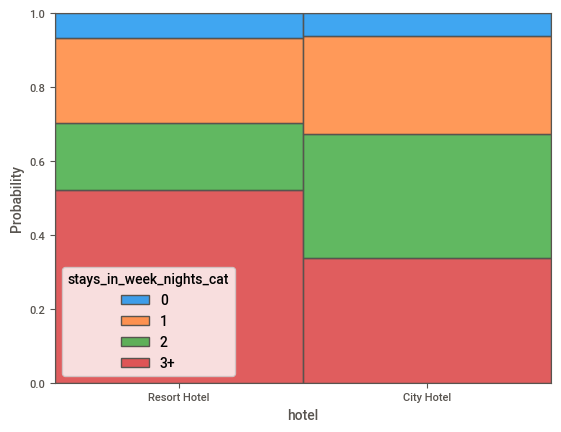

In [96]:
dane['stays_in_week_nights_cat'] = pd.cut(
    dane['stays_in_week_nights'],
    bins=[-1, 0, 1, 2, float('inf')],
    labels=['0', '1', '2', '3+']
)

sns.histplot(
    data=dane,
    x='hotel',
    hue='stays_in_week_nights_cat',
    multiple='fill',
    stat='probability'
)

<Axes: xlabel='hotel', ylabel='Probability'>

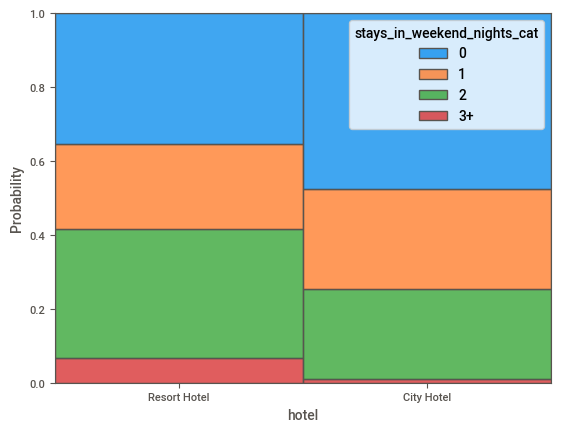

In [97]:
dane['stays_in_weekend_nights_cat'] = pd.cut(
    dane['stays_in_weekend_nights'],
    bins=[-1, 0, 1, 2, float('inf')],
    labels=['0', '1', '2', '3+']
)

sns.histplot(
    data=dane,
    x='hotel',
    hue='stays_in_weekend_nights_cat',
    multiple='fill',
    stat='probability'
)

<Axes: xlabel='stays_in_week_nights', ylabel='stays_in_weekend_nights'>

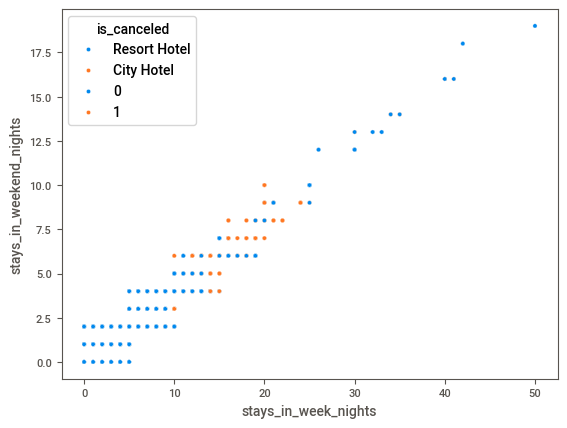

In [ ]:
sns.scatterplot(data = dane, x = 'stays_in_week_nights', y = 'stays_in_weekend_nights', hue = 'hotel')
plt.show()

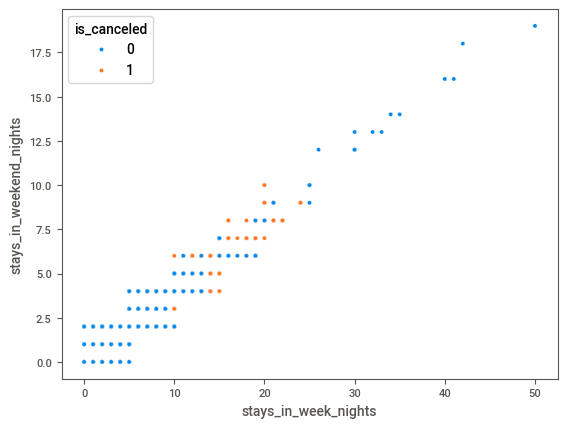

In [100]:
sns.scatterplot(data = dane, x = 'stays_in_week_nights', y = 'stays_in_weekend_nights', hue = 'is_canceled')
plt.show()

<Axes: xlabel='stays_in_week_nights', ylabel='lead_time'>

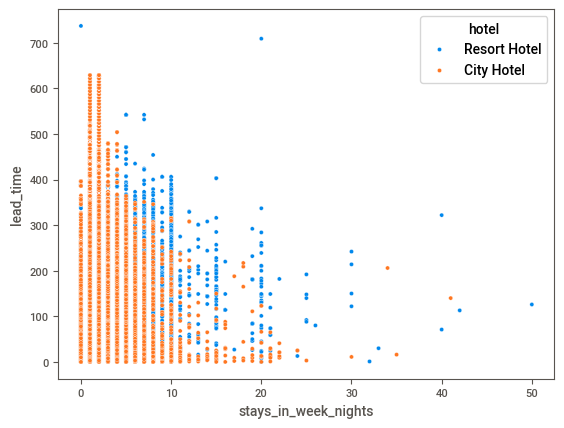

In [101]:
sns.scatterplot(data = dane, x = 'stays_in_week_nights', y = 'lead_time', hue = 'hotel')
plt.show()


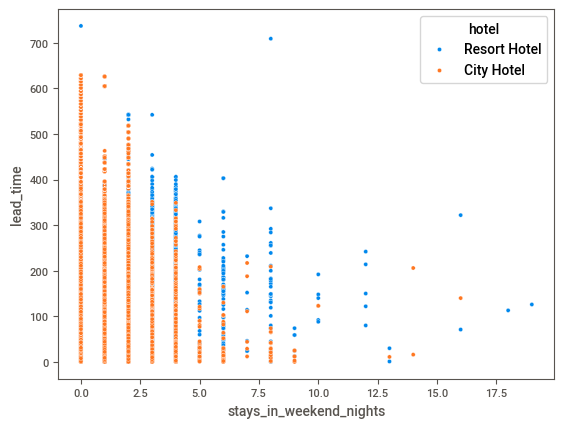

In [102]:
sns.scatterplot(data = dane, x = 'stays_in_weekend_nights', y = 'lead_time', hue = 'hotel') 
plt.show()

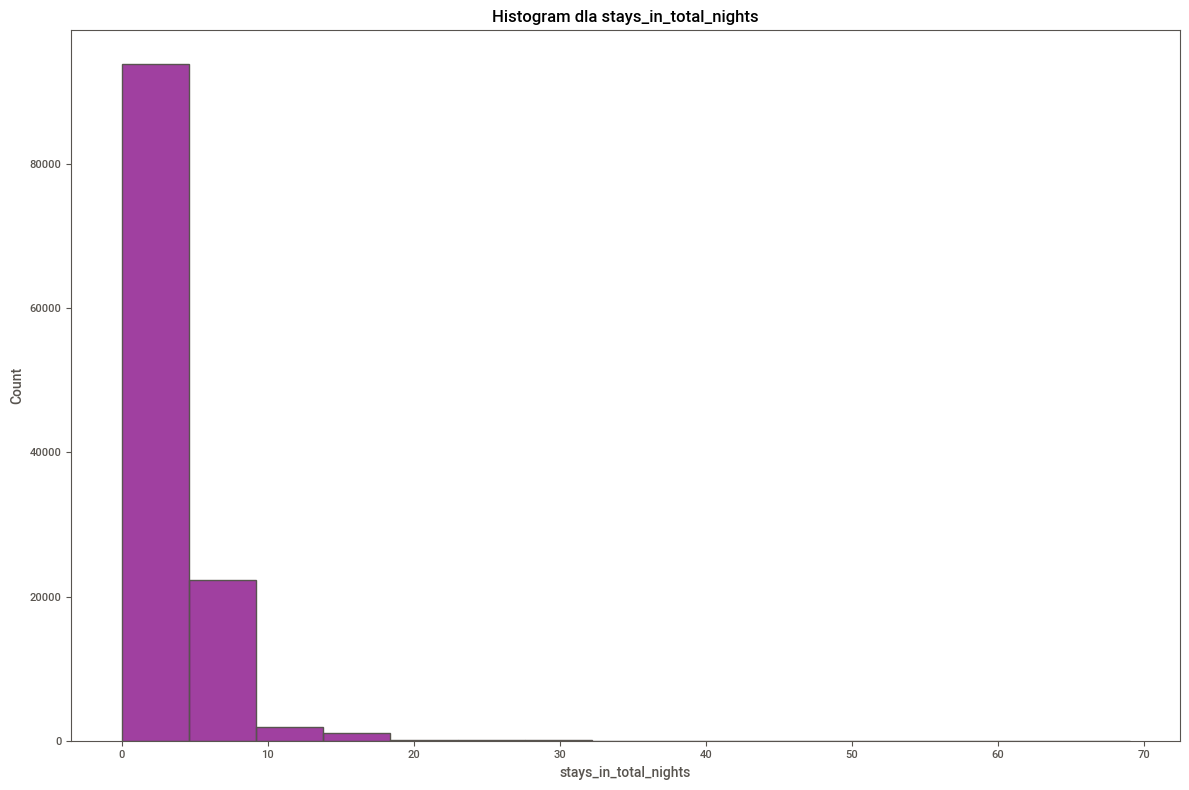

C:\Users\Jan-M\AppData\Local\Temp\ipykernel_25060\1661058960.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




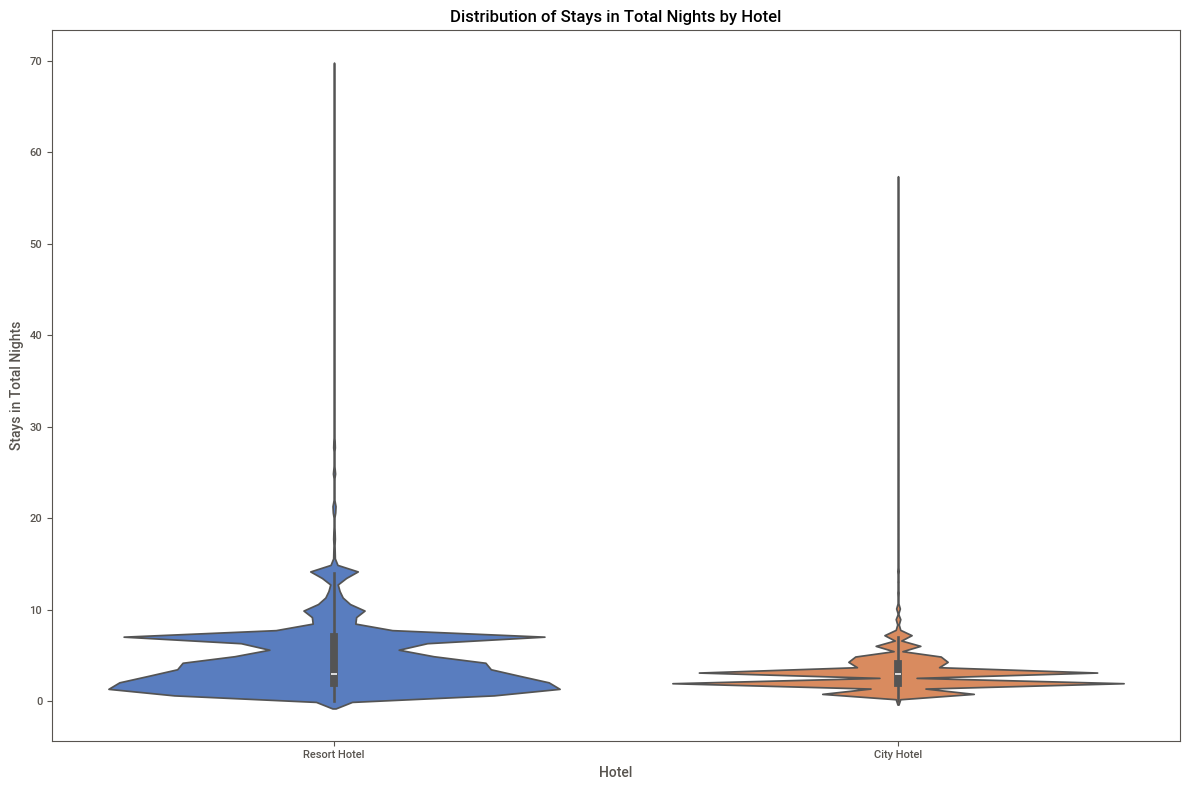

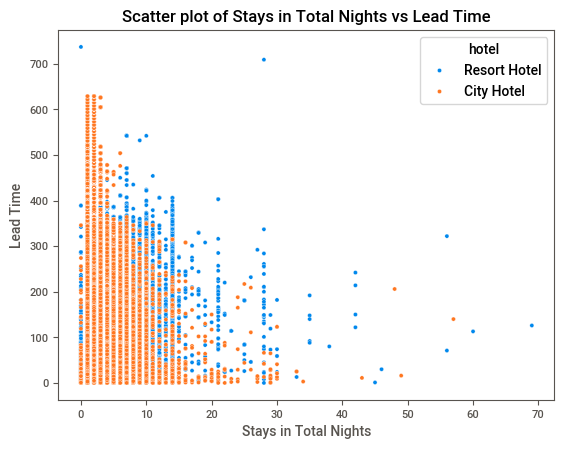

In [103]:
# Add the new column stays_in_total_nights
dane['stays_in_total_nights'] = dane['stays_in_weekend_nights'] + dane['stays_in_week_nights']

# Plot the histogram for stays_in_total_nights
plt.figure(figsize=(12, 8))
sns.histplot(dane['stays_in_total_nights'], bins=15, color='purple')
plt.title('Histogram dla stays_in_total_nights')
plt.xlabel('stays_in_total_nights')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot the violin plot for stays_in_total_nights by hotel
plt.figure(figsize=(12, 8))
sns.violinplot(data=dane, x='hotel', y='stays_in_total_nights', palette='muted')
plt.title('Distribution of Stays in Total Nights by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Stays in Total Nights')
plt.tight_layout()
plt.show()

# Plot the scatter plot for stays_in_total_nights vs lead_time
sns.scatterplot(data=dane, x='stays_in_total_nights', y='lead_time', hue='hotel')
plt.title('Scatter plot of Stays in Total Nights vs Lead Time')
plt.xlabel('Stays in Total Nights')
plt.ylabel('Lead Time')
plt.show()

Dla niektórych wierszy po zsumowaniu stays_in_weekend_nights oraz stays_in_week_nights okazuje się, że wartość wynosi 0 co trzeba zweryfikować, ponieważ mogą to być błędne dane.

[(0.0, 16.0)]

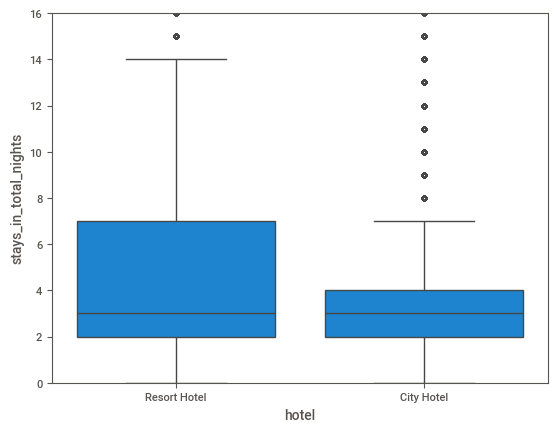

In [125]:
g = sns.boxplot(data = dane, x = 'hotel', y = 'stays_in_total_nights') 
g.set(ylim=(0, 16))

[(0.0, 10.0)]

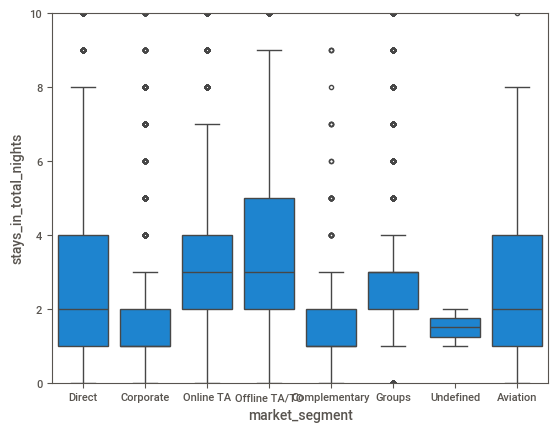

In [119]:
g = sns.boxplot(data = dane, x = 'market_segment', y = 'stays_in_total_nights') 
g.set(ylim=(0, 10))

[(0.0, 15.0)]

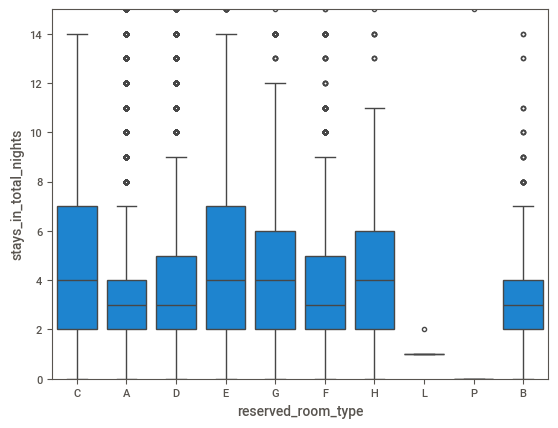

In [118]:
g = sns.boxplot(data = dane, x = 'reserved_room_type', y = 'stays_in_total_nights') 
g.set(ylim=(0, 15))

[(0.0, 16.0)]

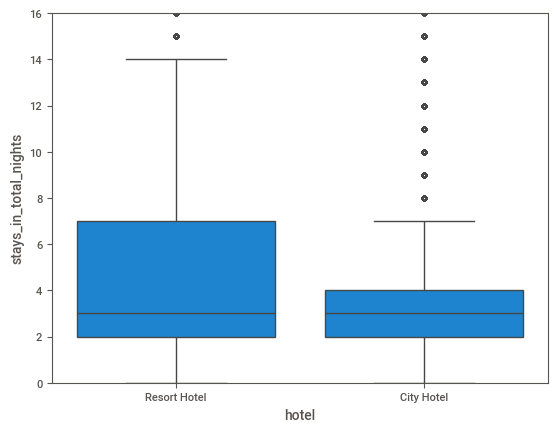

In [124]:
g = sns.boxplot(data = dane, x = 'hotel', y = 'stays_in_total_nights') 
g.set(ylim=(0, 16))

In [127]:
dane[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_total_nights']].dtypes

stays_in_weekend_nights    int64
stays_in_week_nights       int64
stays_in_total_nights      int64
dtype: object

In [126]:
dane[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_total_nights']].describe()

stays_in_weekend_nights  stays_in_week_nights  stays_in_total_nights
count            119390.000000         119390.000000          119390.000000
mean                  0.927599              2.500302               3.427900
std                   0.998613              1.908286               2.557439
min                   0.000000              0.000000               0.000000
25%                   0.000000              1.000000               2.000000
50%                   1.000000              2.000000               3.000000
75%                   2.000000              3.000000               4.000000
max                  19.000000             50.000000              69.000000

In [128]:
dane[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_total_nights']].isna().sum()

stays_in_weekend_nights    0
stays_in_week_nights       0
stays_in_total_nights      0
dtype: int64

### Obsługa brakujących danych

In [83]:
dane.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

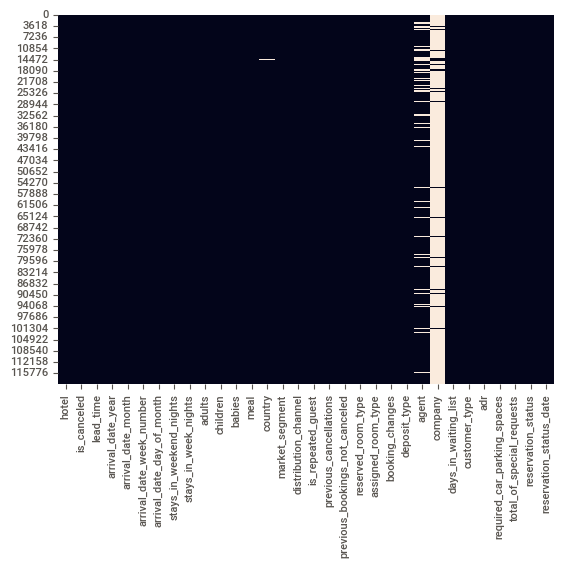

In [82]:
sns.heatmap(dane.isnull(), cbar=False)